In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime, timedelta
from scipy.stats import poisson, truncnorm
from random import randrange
import pandas as pd
from scipy.stats import halfcauchy 

warnings.filterwarnings("ignore",category=UserWarning)

import sys
sys.path.insert(0, "C:/workspace/stress_test_sim//libs")
from monte_carlo import CauchyGenerator, PoissonGenerator, NormalGenerator, ParetoGenerator, LognormalGenerator, Transaction, MonteCarloTransactionSimulator, CauchyParameterSearcher, LognormalParameterSearcher
from transaction_history_v3_tools import TransactionHistory


In [2]:
def generator_week_df_and_plot(simulator: MonteCarloTransactionSimulator, time_window: int, x_size: int, y_size: int, x_bin_limit: int):
    current_iteration_timestamp = datetime.now()
    for index in range(time_window):
        simulator.generate_transactions(current_iteration_timestamp)
        current_iteration_timestamp += timedelta(milliseconds=simulator.frequency_generator.cycle_size)

    cauchy_sim_df = simulator.get_dataframe()

    plt.figure(figsize=(x_size, y_size))
    print("cauchy min token in = " + str(cauchy_sim_df.TokenInAmount.min()))
    print("cauchy max token in = " + str(cauchy_sim_df.TokenInAmount.max()))
    sns.histplot(data=cauchy_sim_df, x="TokenInAmount", bins=50, binrange=[0, x_bin_limit])
    plt.show()

# High capitalization

## DAI/USDC

Total tokens locked (checked at 2-nd November 2021):
* DAI = 101.89 m
* USDC = 35.80 m

Target price:
* 1 DAI = 1 USDC, 
* 1 USDC = 1 DAI

Actual price:
* 1 DAI = 0.9994 USDC
* 1 USDC = 1.0006 DAI

In [14]:
# read transaction history
dai_usdc_df = pd.read_csv(os.getcwd() + "\stress_test_sim\pools_history\csv_tables\high_DAI-USDC_01-10_31_10.csv", index_col=False)

# make sure that Value will be interpreted as floating point number, remove possible 0 value elements
dai_usdc_df.Value = dai_usdc_df.Value.str.replace(",", "")
dai_usdc_df.Value = dai_usdc_df.Value.astype("float")
dai_usdc_df = dai_usdc_df[dai_usdc_df.Value > 0]

# make sure that datetime parameter is interpreted as date
dai_usdc_df['Datetime'] = pd.to_datetime(dai_usdc_df['UnixTimestamp'], unit='s')

# form transaction history separated by categories
th = TransactionHistory()
th.classify_history(dai_usdc_df)

In [15]:
th.show_transactions_frequencies_per_minute()
th.show_min_max_values_by_token()

Swapping in USDC transactions frequency: 0.09199476076739348
Swapping in DAI transactions frequency: 0.09299637876569844
Swapping out transactions frequency: 0.18499113953309193
Investitions frequency: 0.0037443834248627058
Extractions frequency: 0.00406605260974193


NameError: name 'th' is not defined

(2.7835083236740954, 18090)


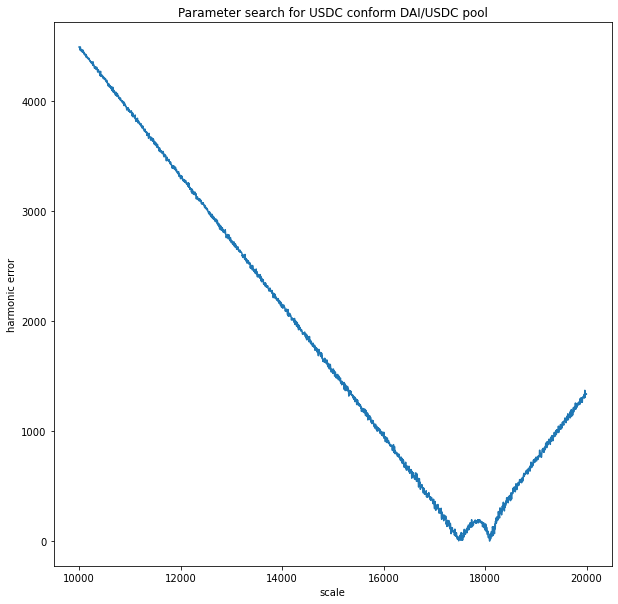

In [84]:
searcher = ParameterSearcher(CauchyGenerator(loc=0, scale=15000, limit=8000000), th.user_in_swap_df, "USDC")

searcher.search_parameters(initial_scale=10000, step=5, final_scale=20000, acc=1000, 
                            title='Parameter search for USDC conform DAI/USDC pool')

(3.541178064105301, 11250)


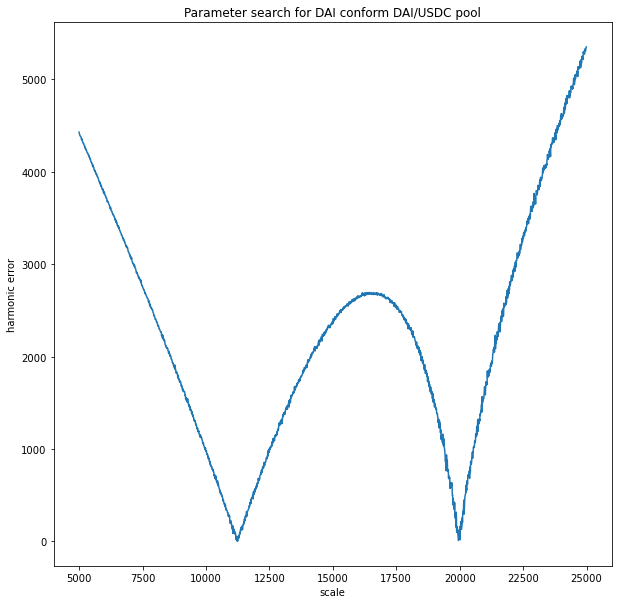

In [85]:
searcher = ParameterSearcher(CauchyGenerator(loc=0, scale=15000, limit=8000000), th.user_in_swap_df, "DAI")

searcher.search_parameters(initial_scale=5000, step=10, final_scale=25000, acc=1000, 
                            title='Parameter search for DAI conform DAI/USDC pool')

cauchy min token in = 16.543524641828796
cauchy max token in = 2407355.349123314


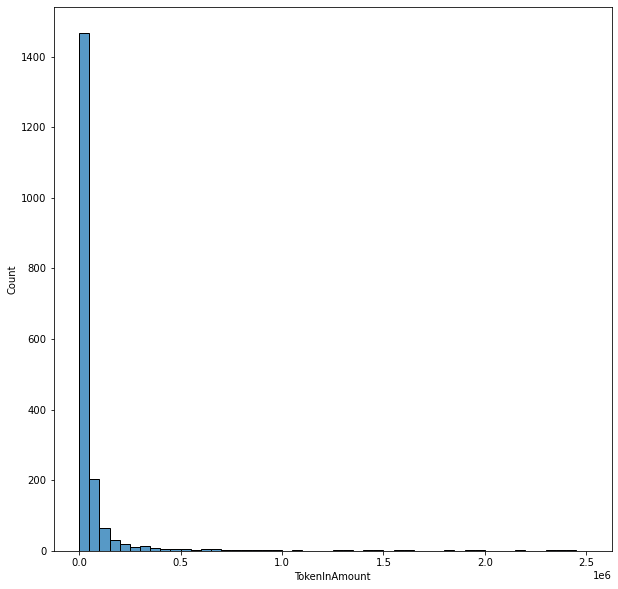

In [87]:
cauchy_simulation = MonteCarloTransactionSimulator(frequency_generator=PoissonGenerator(cycle_size=60000, mean_occurencies=0.18499113953309193),
                                                    token_in_generator=CauchyGenerator(0, 19920, 2500000),
                                                    first_currency="first", second_currency="second")

generator_week_df_and_plot(simulator=cauchy_simulation, time_window=60*24*7, x_size=10, y_size=10, x_bin_limit=2500000)

['USDC' 'DAI']


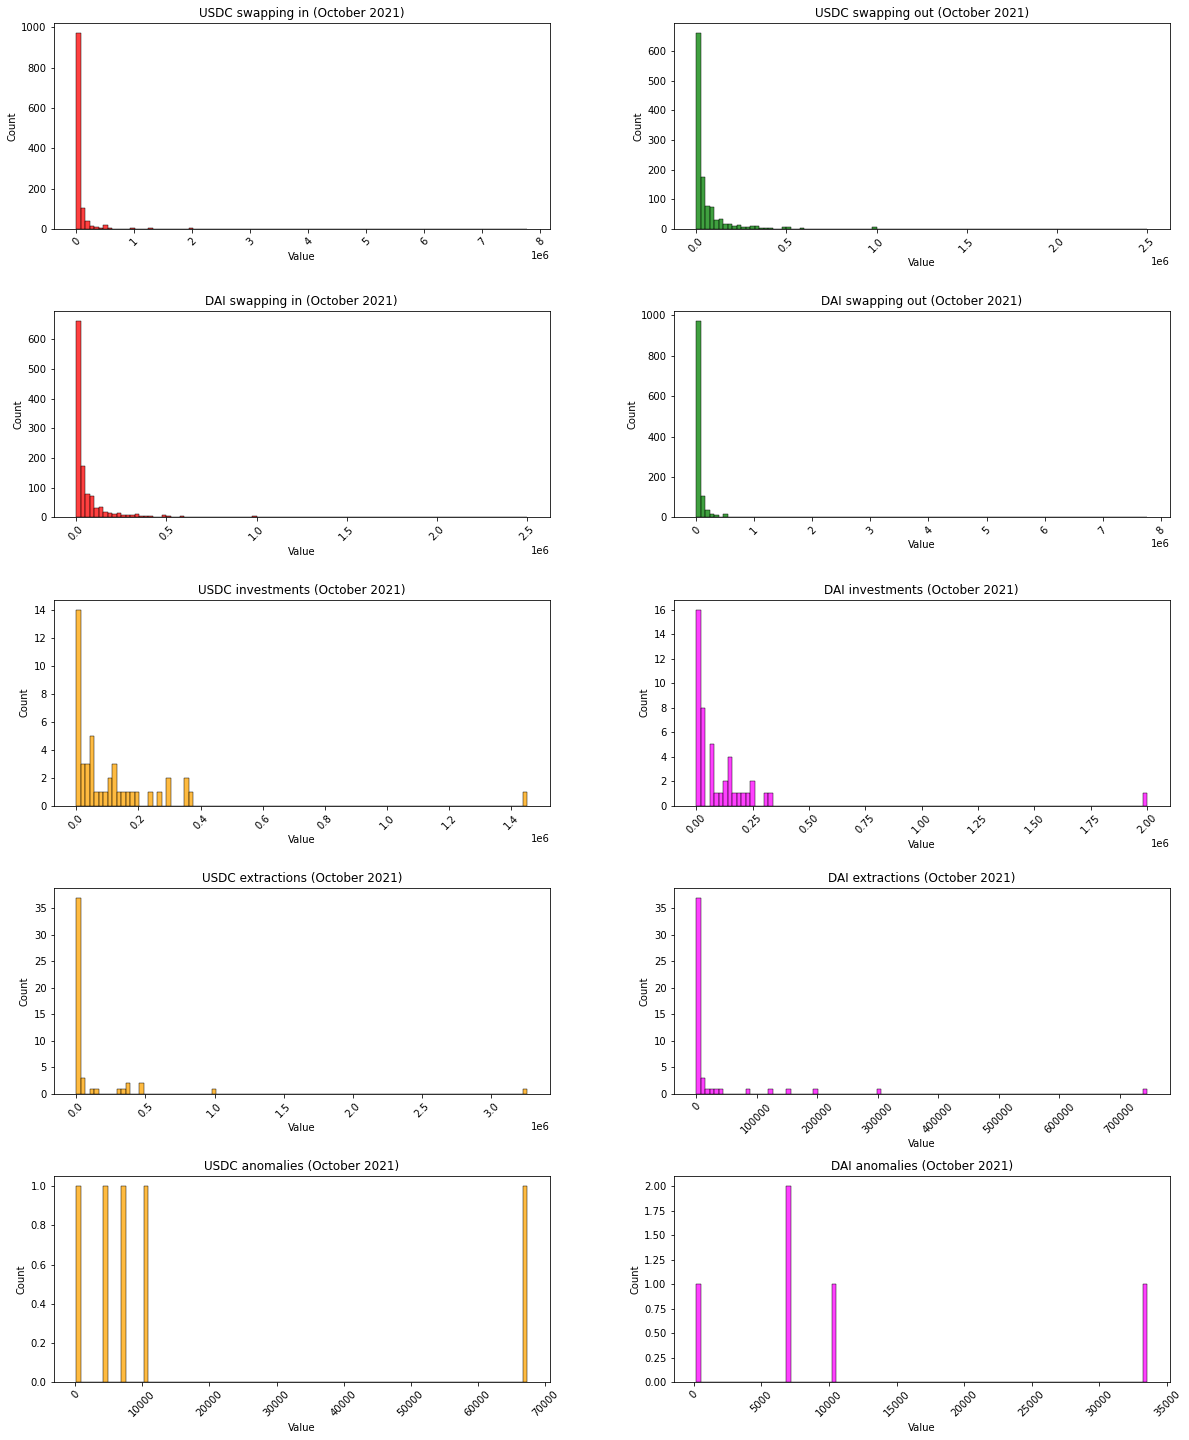

In [476]:
th.histplots_matrix(20, 25, 0.4, 0.25, 'October 2021', 100)

['USDC' 'DAI']


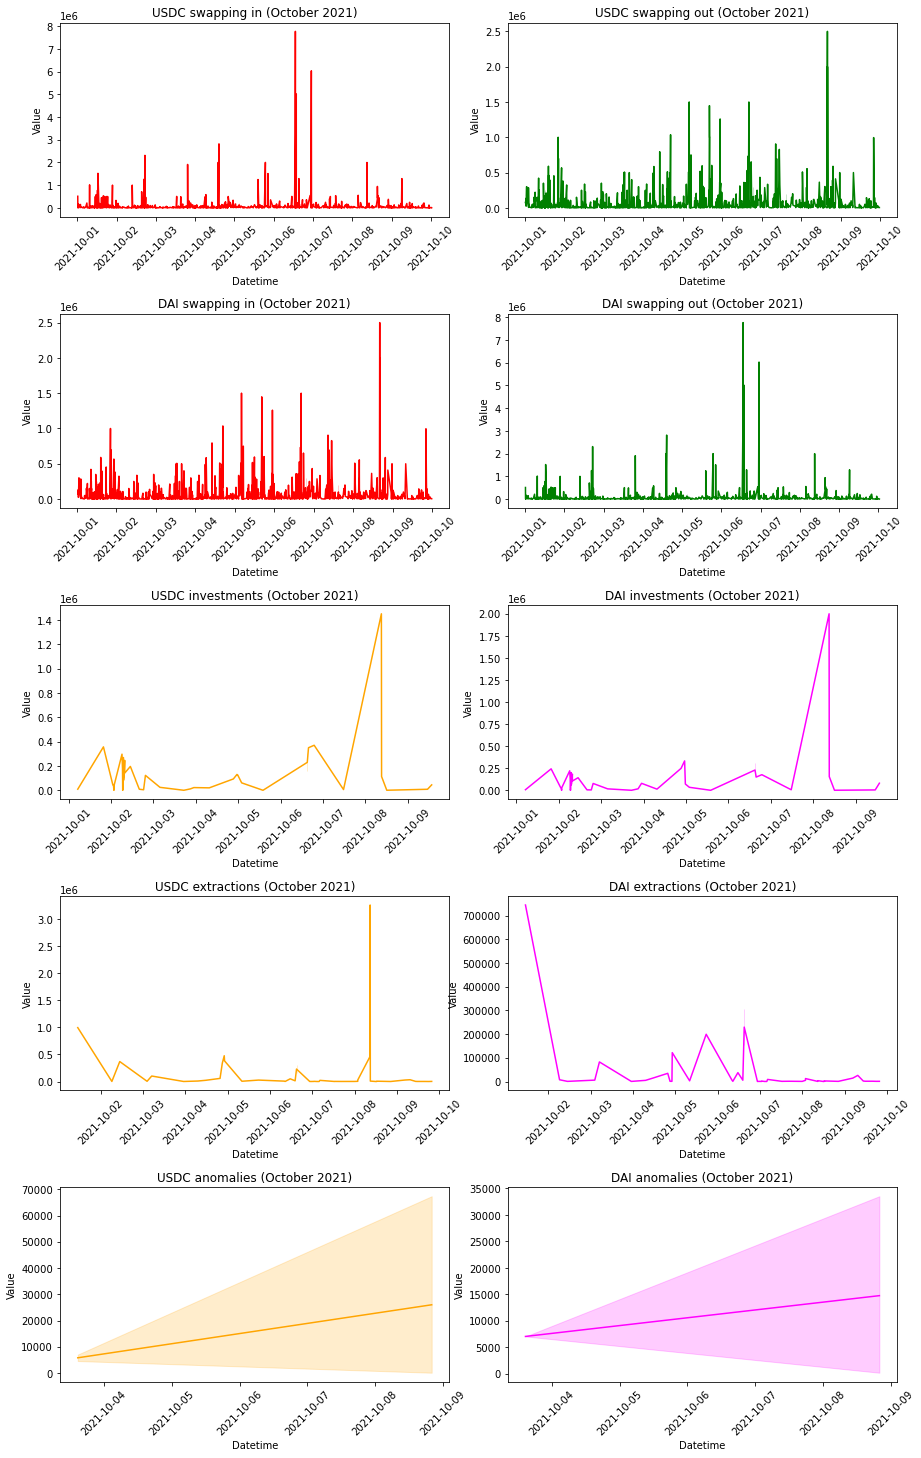

In [29]:
th.lineplots_matrix(15, 25, 0.5, 0.15, 'October 2021')

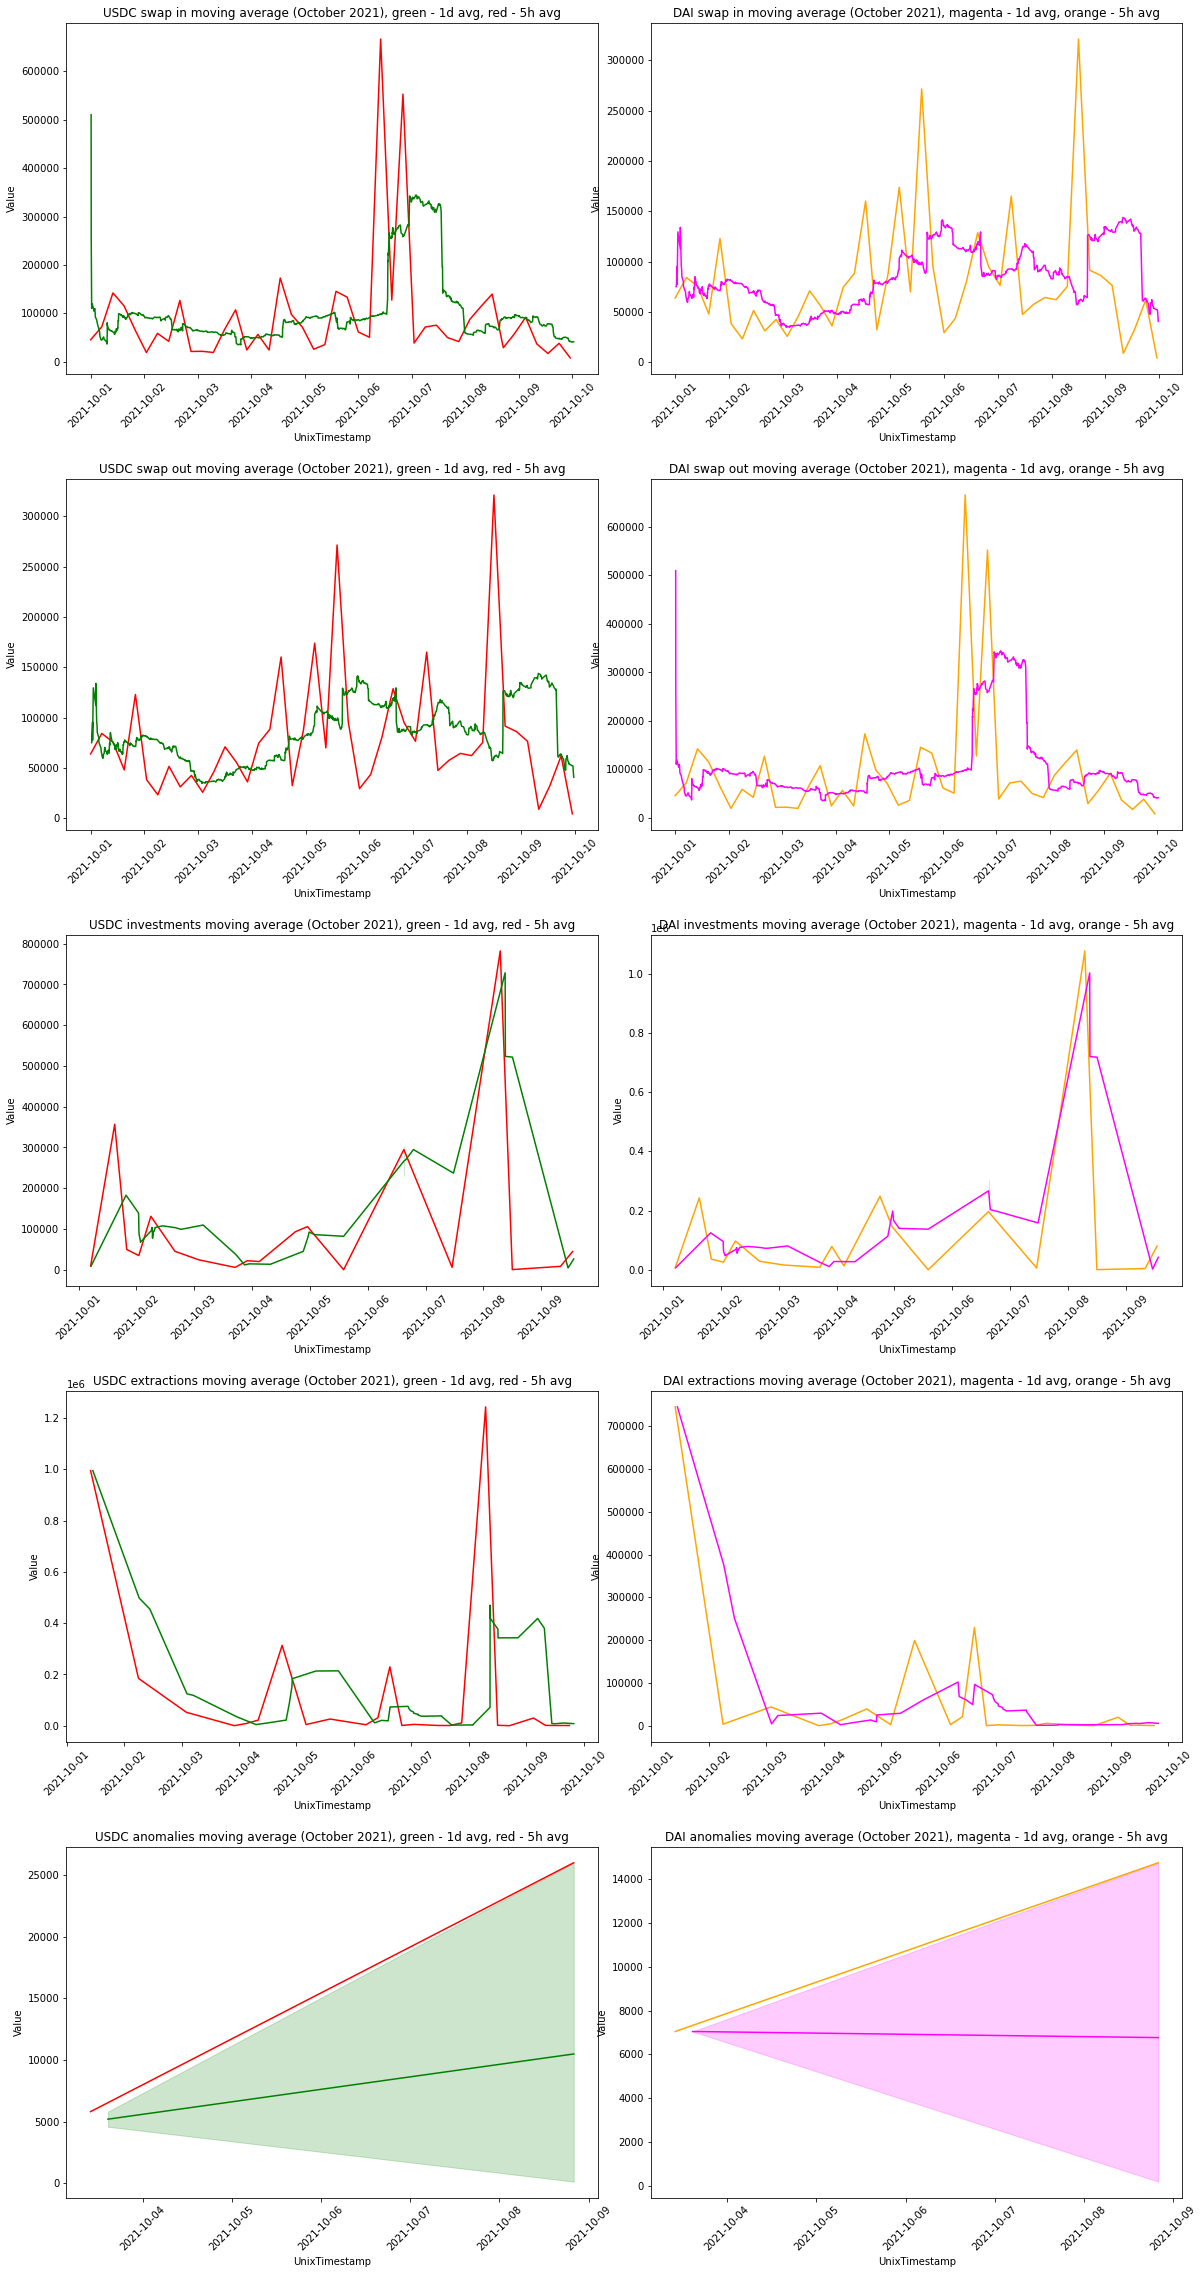

In [153]:
th.lineplots_moving_averages_matrix_by_token(20, 40, 0.3, 0.1, 'USDC', 'DAI', 'October 2021', '5h', '1d')

## ETH/USDC

Total tokens locked (checked at 2-nd November 2021):
* ETH = 18.83 k
* USDC = 90.04 m

Target price:
* 1 ETH = 4.32 k USDC, 
* 1 USDC = <0.001 ETH

Actual price:
* 1 ETH = 4 328.5332 USDC
* 1 USDC = 0.0002 ETH

In [12]:
# read transaction history
eth_usdc_df = pd.read_csv(os.getcwd() + "\stress_test_sim\pools_history\high_ETH-USDC_01-01_31-10.csv", index_col=False)

# make sure that Value will be interpreted as floating point number, remove possible 0 value elements
eth_usdc_df.Value = eth_usdc_df.Value.str.replace(",", "")
eth_usdc_df.Value = eth_usdc_df.Value.astype("float")
eth_usdc_df = eth_usdc_df[eth_usdc_df.Value > 0]

# make sure that datetime parameter is interpreted as date
eth_usdc_df['Datetime'] = pd.to_datetime(eth_usdc_df['UnixTimestamp'], unit='s')

# form transaction history separated by categories
th = TransactionHistory()
th.classify_history(eth_usdc_df)

In [13]:
th.show_transactions_frequencies_per_minute()
th.show_min_max_values_by_token()

Swapping in WETH transactions frequency: 0.5207725947521866
Swapping in USDC transactions frequency: 0.36443148688046645
Swapping out transactions frequency: 0.8852040816326531
Investitions frequency: 0.02089905362776025
Extractions frequency: 0.0036407766990291263
swapping in WETH min = 0.0001
swapping in WETH max = 50.0
swapping out WETH min = 0.000287592701391375
swapping out WETH max = 56.047770246074705
swapping in USDC min = 1.0
swapping in USDC max = 199565.96116
swapping out USDC min = 0.344876
swapping out USDC max = 177511.142949


(0.0003331396104216076, 0.33)


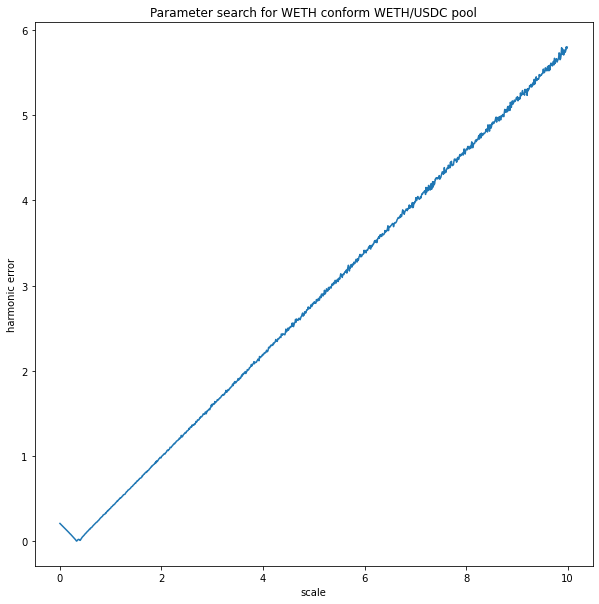

In [496]:
searcher = ParameterSearcher(CauchyGenerator(loc=0, scale=15000, limit=60), th.user_in_swap_df, "WETH")

searcher.search_parameters(initial_scale=0, step=0.01, final_scale=10, acc=100, 
                            title='Parameter search for WETH conform WETH/USDC pool')

cauchy min token in = 4.6754627420294145e-05
cauchy max token in = 57.38602434032827


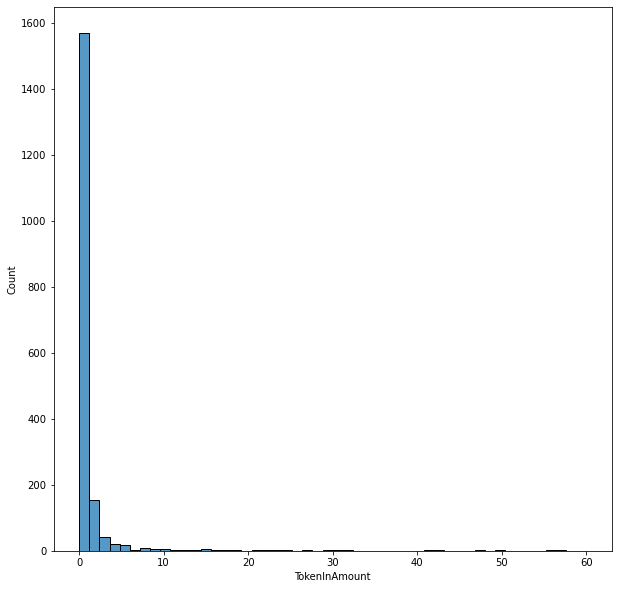

In [77]:
cauchy_simulation = MonteCarloTransactionSimulator(frequency_generator=PoissonGenerator(cycle_size=60000, mean_occurencies=0.18499113953309193),
                                                    token_in_generator=CauchyGenerator(0, 0.33, 60),
                                                    first_currency="first", second_currency="second")

generator_week_df_and_plot(simulator=cauchy_simulation, time_window=60*24*7, x_size=10, y_size=10, x_bin_limit=60)

(0.5112553125014219, 1360)


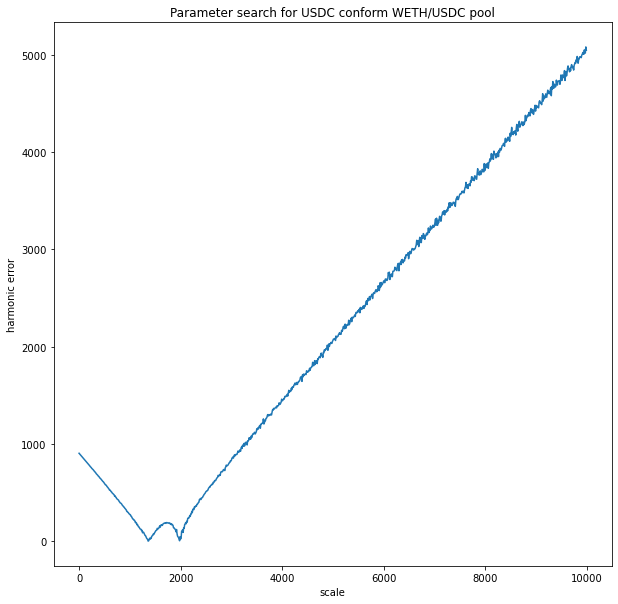

In [498]:
searcher = ParameterSearcher(CauchyGenerator(loc=0, scale=15000, limit=210000), th.user_in_swap_df, "USDC")

searcher.search_parameters(initial_scale=0, step=10, final_scale=10000, acc=100, 
                            title='Parameter search for USDC conform WETH/USDC pool')

cauchy min token in = 2.0005292865269833
cauchy max token in = 209223.56160529645


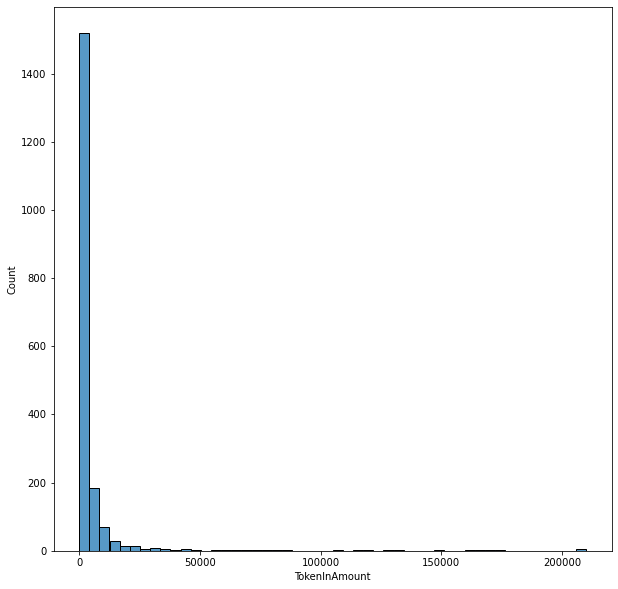

In [75]:
cauchy_simulation = MonteCarloTransactionSimulator(frequency_generator=PoissonGenerator(cycle_size=60000, mean_occurencies=0.18499113953309193),
                                                    token_in_generator=CauchyGenerator(0, 1360, 210000),
                                                    first_currency="first", second_currency="second")

generator_week_df_and_plot(simulator=cauchy_simulation, time_window=60*24*7, x_size=10, y_size=10, x_bin_limit=210000)

['WETH' 'USDC']


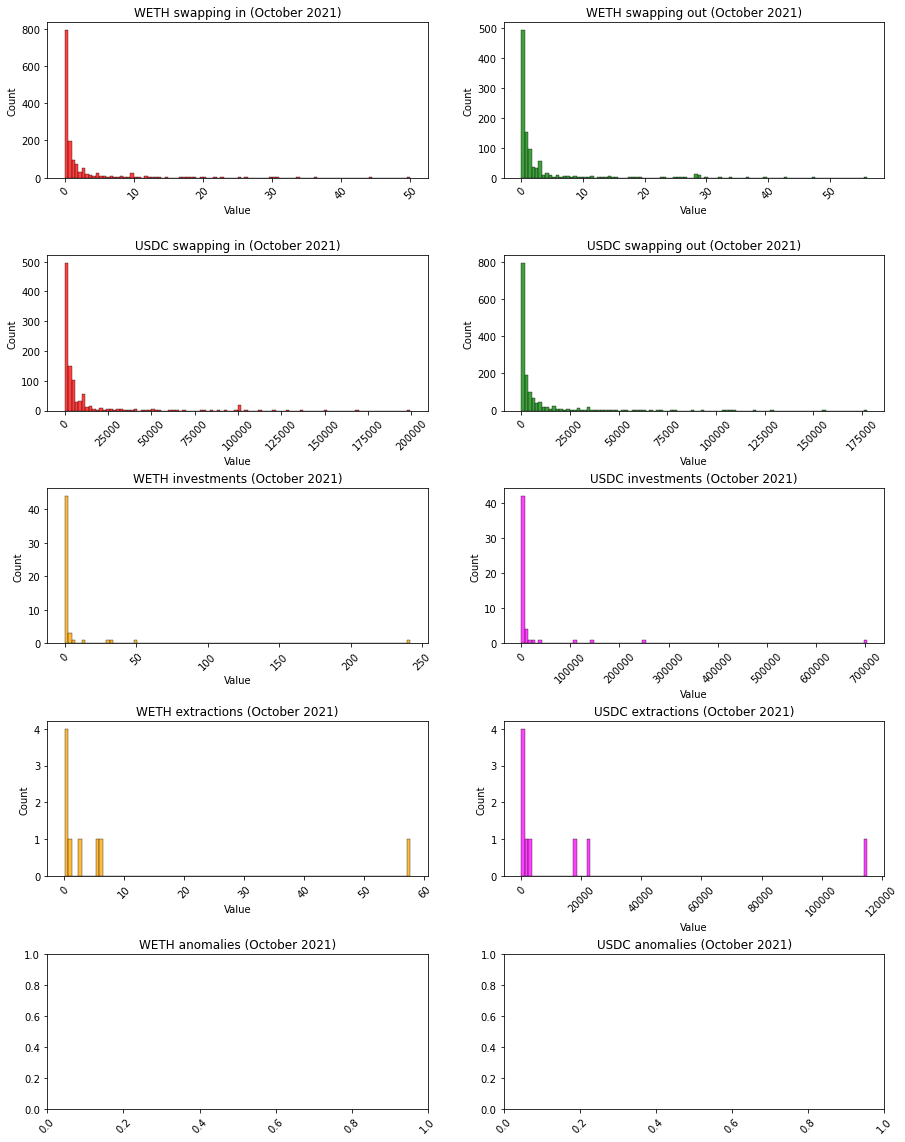

In [156]:
th.histplots_matrix(15, 20, 0.5, 0.2, 'October 2021', 100)

['WETH' 'USDC']


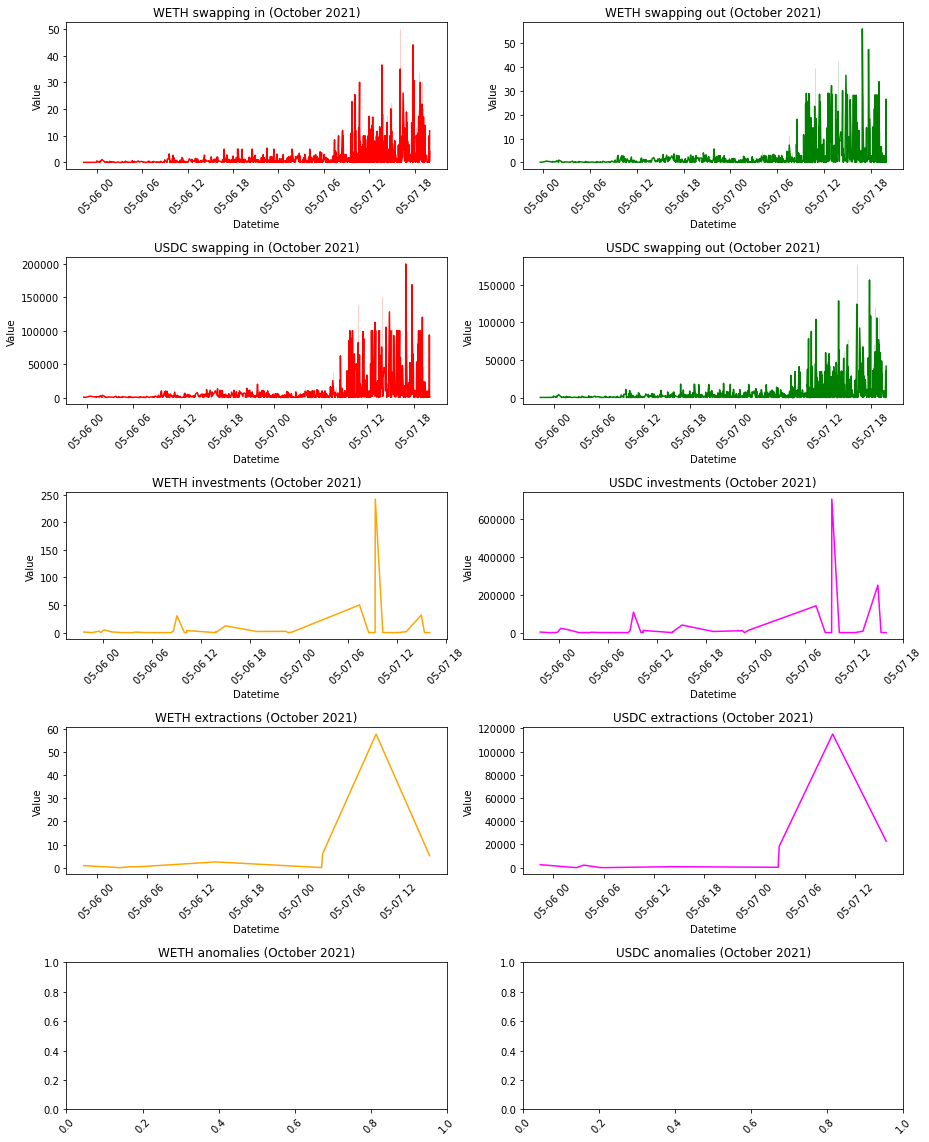

In [155]:
th.lineplots_matrix(15, 20, 0.6, 0.2, 'October 2021')

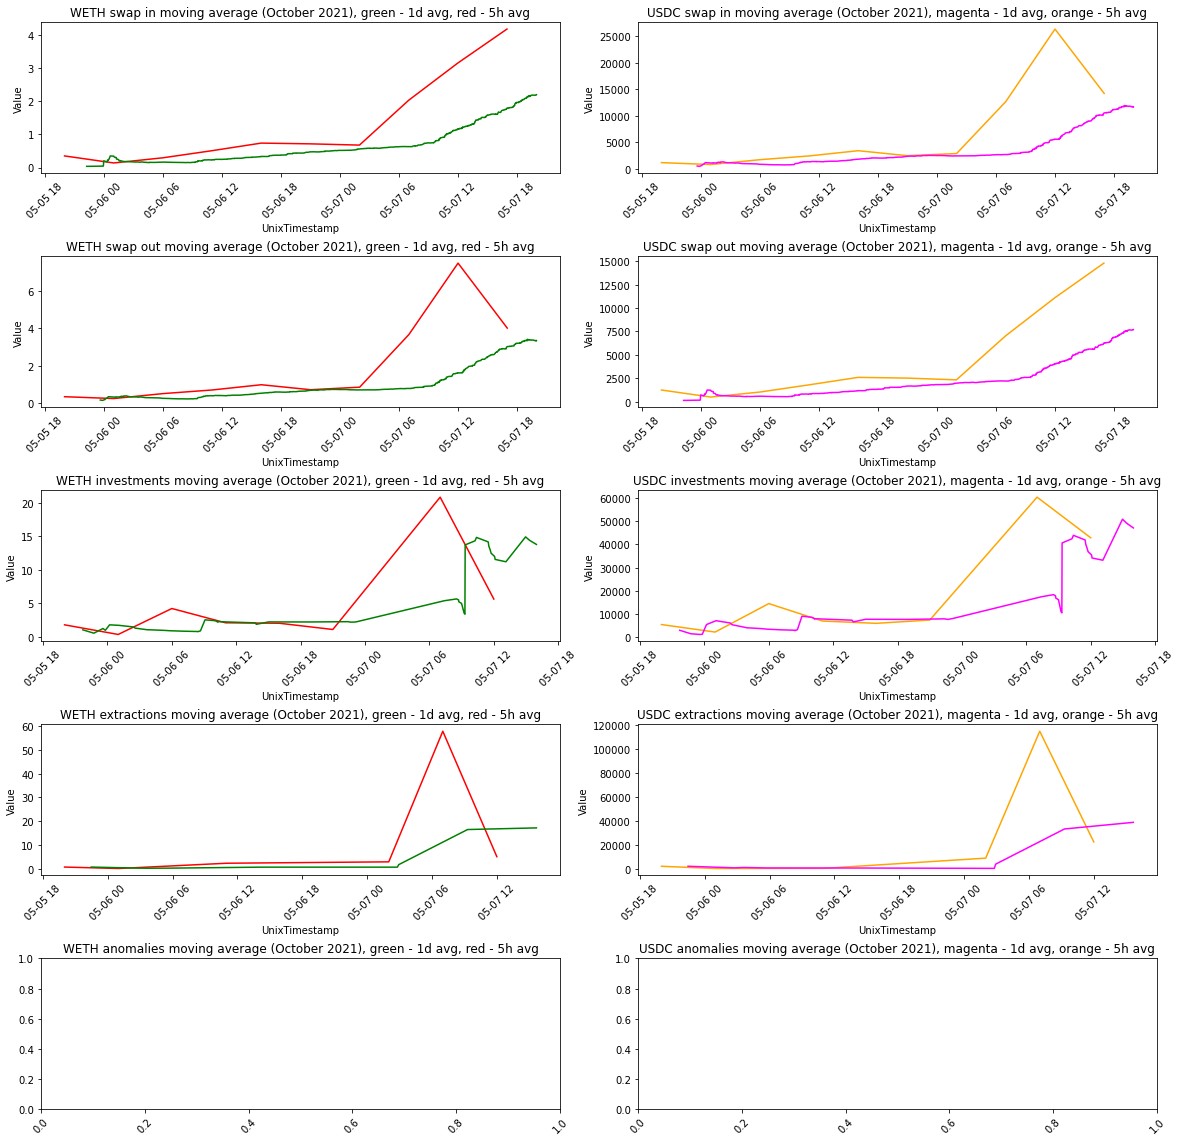

In [157]:
th.lineplots_moving_averages_matrix_by_token(20, 20, 0.55, 0.15, 'WETH', 'USDC', 'October 2021', '5h', '1d')

## ETH/USDT

Total tokens locked (checked at 2-nd November 2021):
* ETH = 17.77 k
* USDT = 84.42 m

Target price:
* 1 ETH = 4.31 k USDT, 
* 1 USDT = <0.001 ETH

Actual price:
* 1 ETH = 4 298.3407 USDT
* 1 USDT = 0.0002 ETH

In [14]:
# read transaction history
eth_usdt_df = pd.read_csv(os.getcwd() + "\stress_test_sim\pools_history\high_ETH-USDT_01-10_31-10.csv", index_col=False)

# make sure that Value will be interpreted as floating point number, remove possible 0 value elements
eth_usdt_df.Value = eth_usdt_df.Value.str.replace(",", "")
eth_usdt_df.Value = eth_usdt_df.Value.astype("float")
eth_usdt_df = eth_usdt_df[eth_usdt_df.Value > 0]

# make sure that datetime parameter is interpreted as date
eth_usdt_df['Datetime'] = pd.to_datetime(eth_usdt_df['UnixTimestamp'], unit='s')

# form transaction history separated by categories
th = TransactionHistory()
th.classify_history(eth_usdt_df)

In [15]:
th.show_transactions_frequencies_per_minute()
th.show_min_max_values_by_token()

Swapping in USDT transactions frequency: 0.14646064447966192
Swapping in WETH transactions frequency: 0.1576862123613312
Swapping out transactions frequency: 0.30414685684099313
Investitions frequency: 0.009550396708786366
Extractions frequency: 0.010739299610894941
swapping in USDT min = 62.770399
swapping in USDT max = 1047226.637254
swapping out USDT min = 1.948806
swapping out USDT max = 811943.903539
swapping in WETH min = 0.000574
swapping in WETH max = 243.2924082960357
swapping out WETH min = 0.019061402297981502
swapping out WETH max = 342.9392762189296


(0.0033446870427841966, 1.1600000000000001)


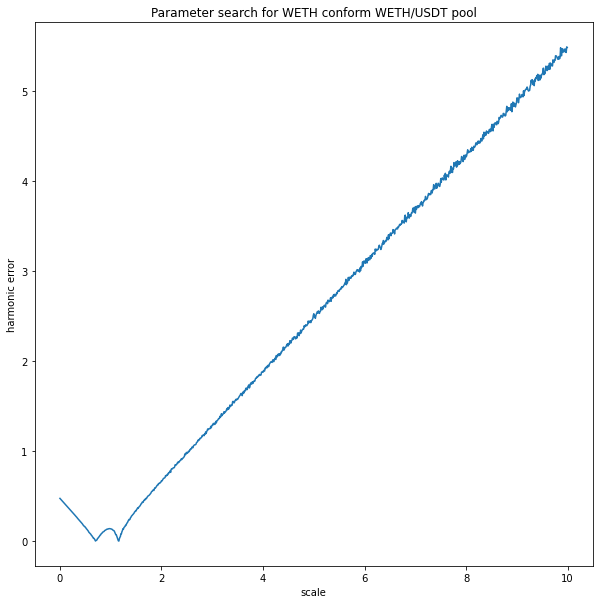

In [504]:
searcher = ParameterSearcher(CauchyGenerator(loc=0, scale=15000, limit=400), th.user_in_swap_df, "WETH")

searcher.search_parameters(initial_scale=0, step=0.01, final_scale=10, acc=100, 
                            title='Parameter search for WETH conform WETH/USDT pool')

cauchy min token in = 0.001203195427541588
cauchy max token in = 396.0570387199187


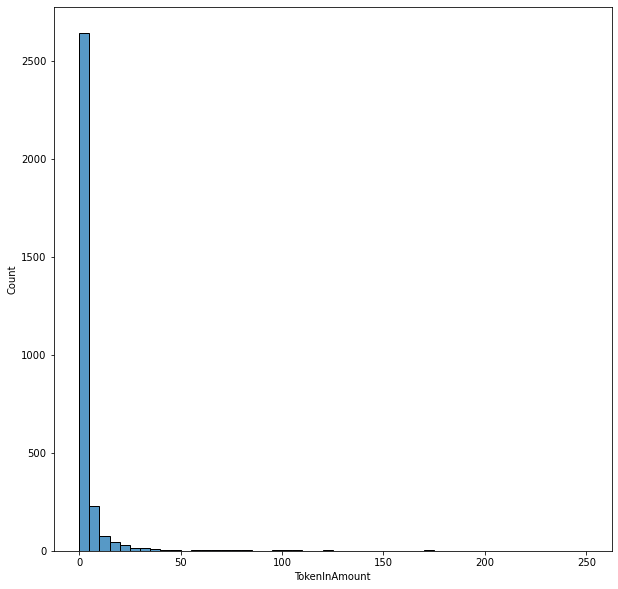

In [510]:
cauchy_simulation = MonteCarloTransactionSimulator(frequency_generator=PoissonGenerator(cycle_size=60000, mean_occurencies=0.30414685684099313),
                                                    token_in_generator=CauchyGenerator(0, 1.16, 400),
                                                    first_currency="first", second_currency="second")

generator_week_df_and_plot(simulator=cauchy_simulation, time_window=60*24*7, x_size=10, y_size=10, x_bin_limit=400)

(3.9972373134836823, 8650)


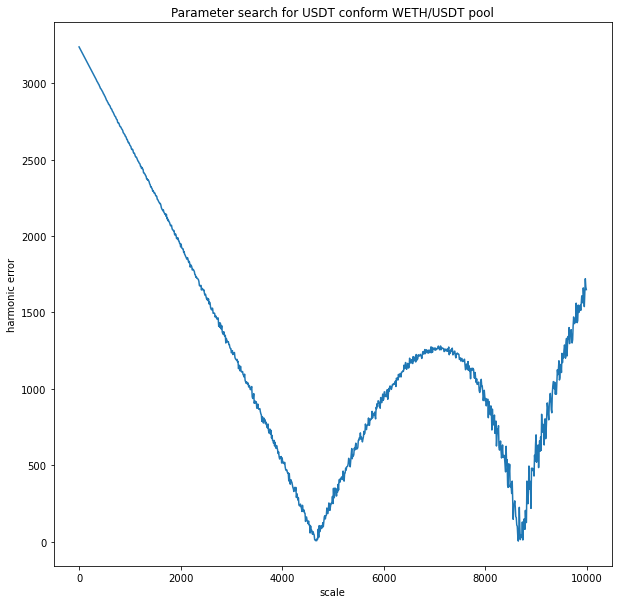

In [507]:
searcher = ParameterSearcher(CauchyGenerator(loc=0, scale=15000, limit=1500000), th.user_in_swap_df, "USDT")

searcher.search_parameters(initial_scale=0, step=10, final_scale=10000, acc=100, 
                            title='Parameter search for USDT conform WETH/USDT pool')

cauchy min token in = 3.4412581686669927
cauchy max token in = 1474091.5944767306


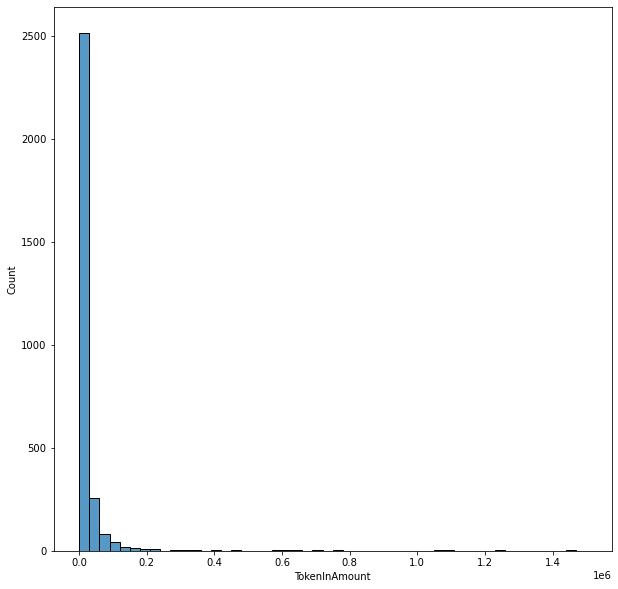

In [515]:
cauchy_simulation = MonteCarloTransactionSimulator(frequency_generator=PoissonGenerator(cycle_size=60000, mean_occurencies=0.30414685684099313),
                                                    token_in_generator=CauchyGenerator(0, 8650, 1500000),
                                                    first_currency="first", second_currency="second")

generator_week_df_and_plot(simulator=cauchy_simulation, time_window=60*24*7, x_size=10, y_size=10, x_bin_limit=1500000)

['USDT' 'WETH']


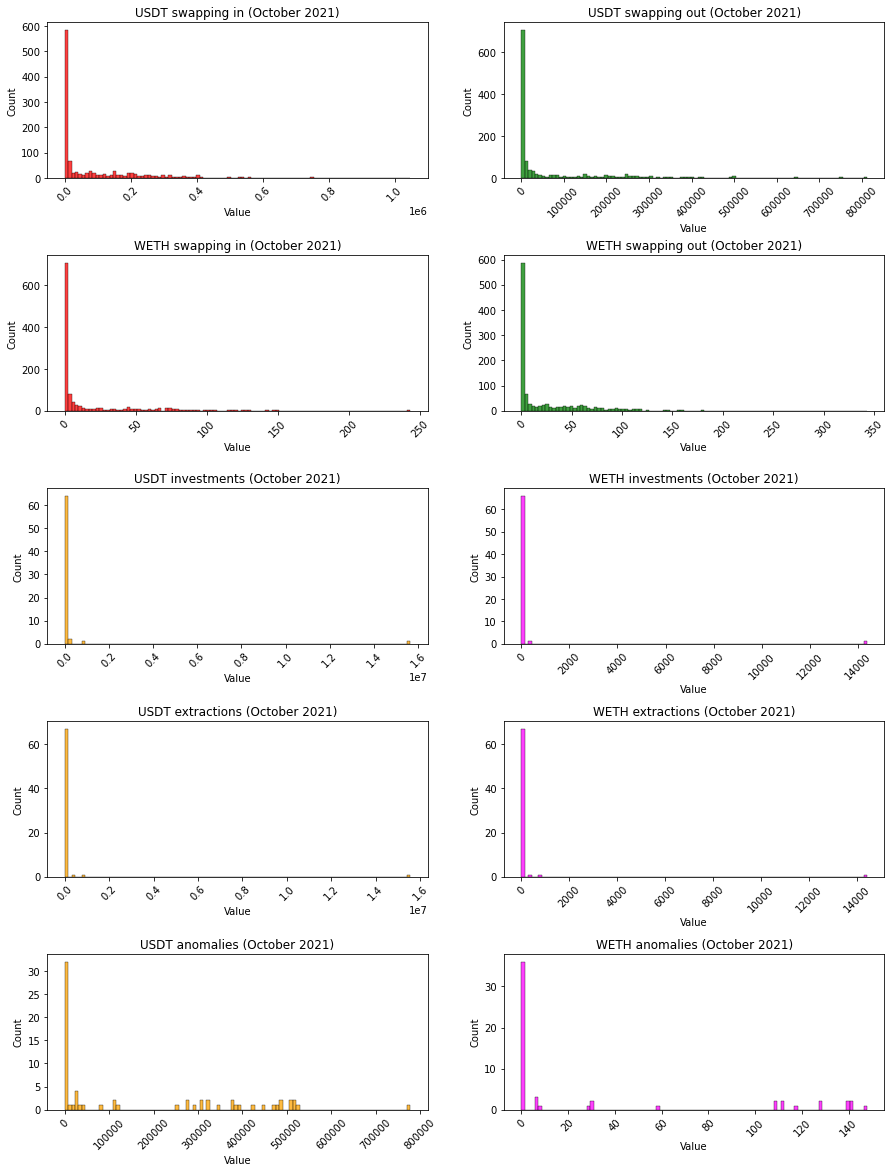

In [160]:
th.histplots_matrix(15, 20, 0.5, 0.2, 'October 2021', 100)

['USDT' 'WETH']


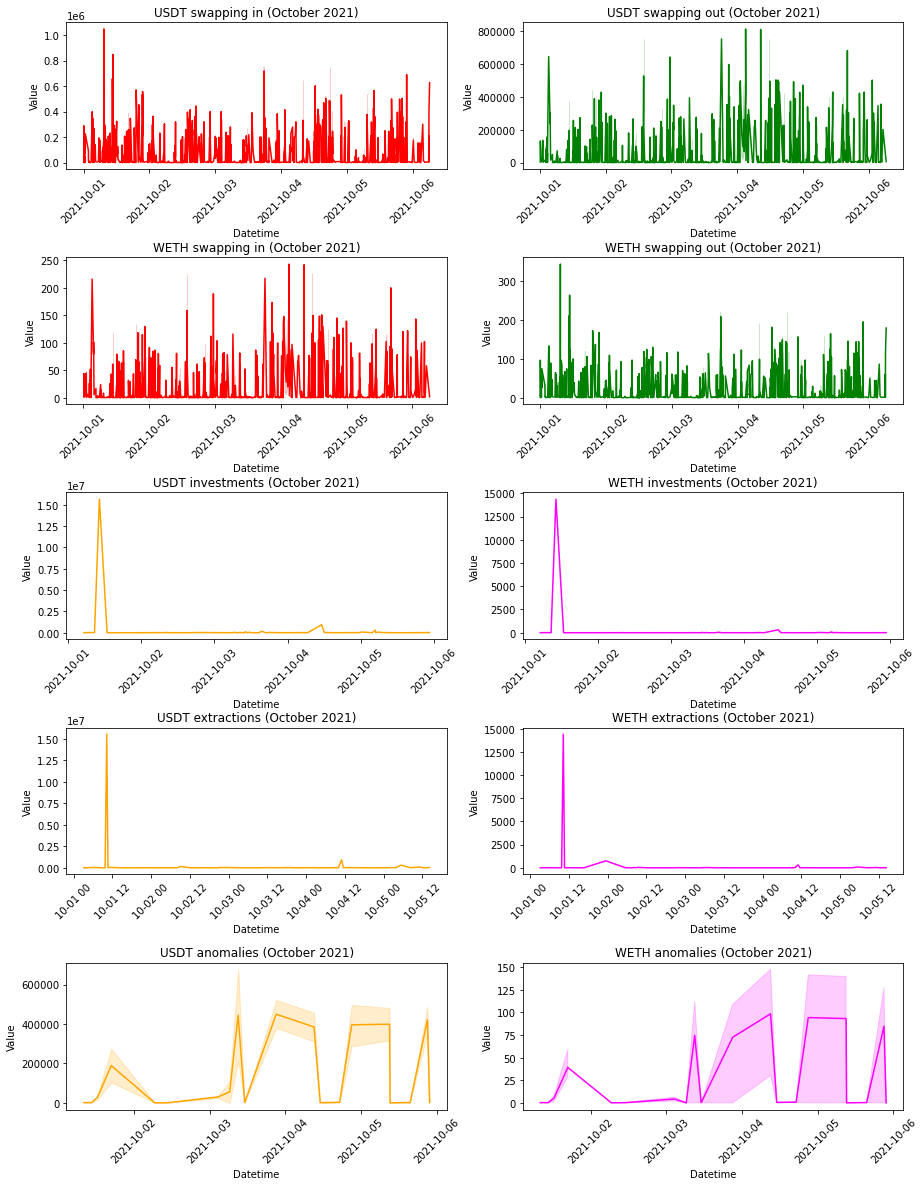

In [159]:
th.lineplots_matrix(15, 20, 0.6, 0.2, 'October 2021')

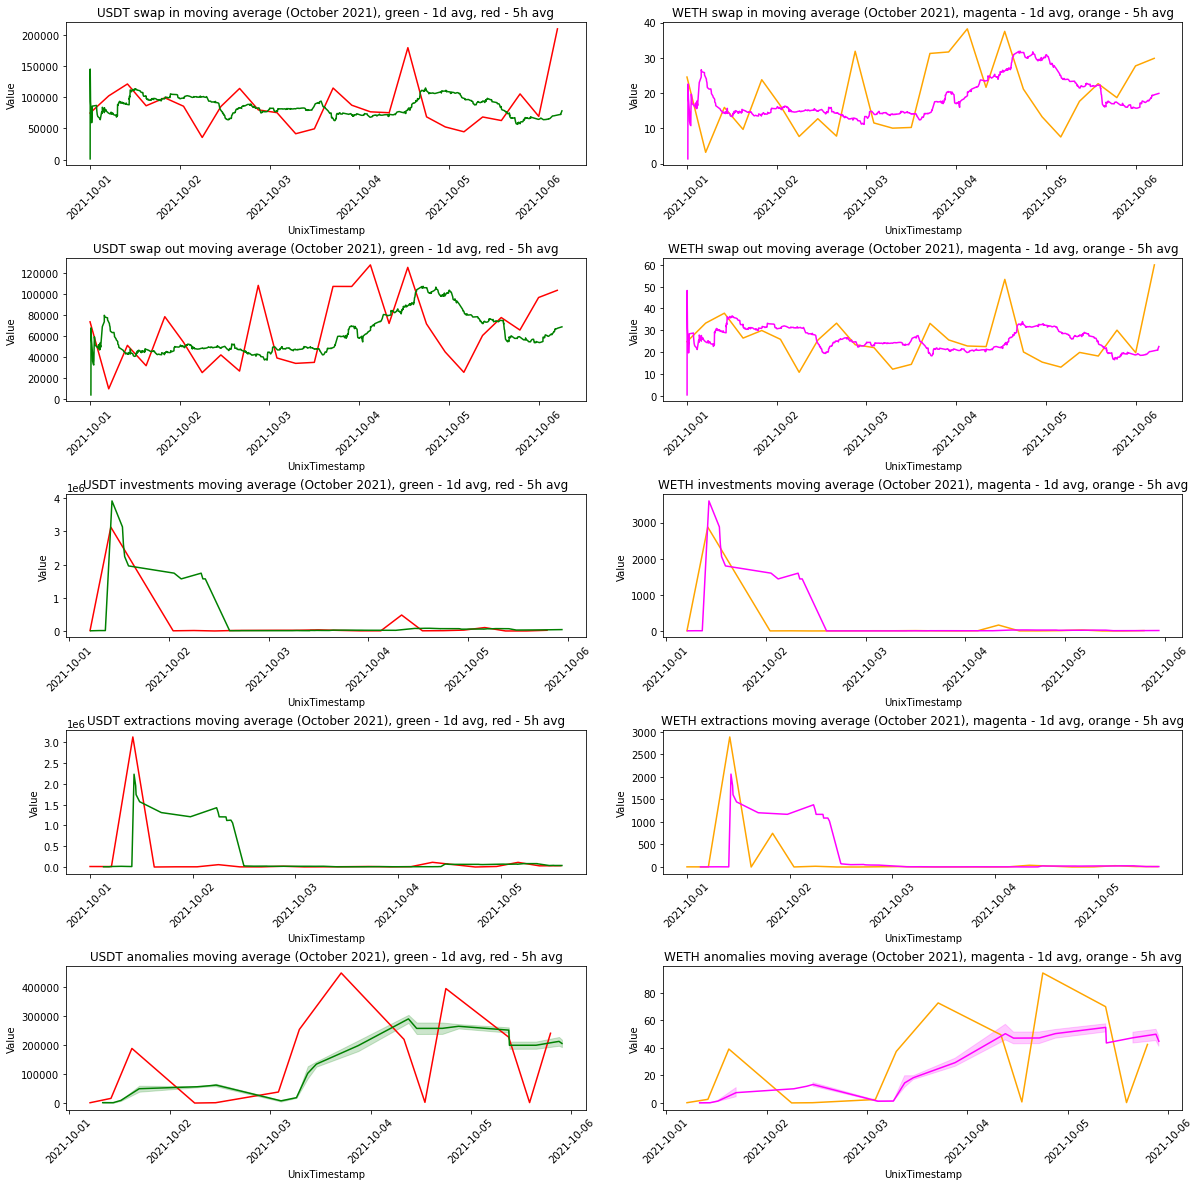

In [161]:
th.lineplots_moving_averages_matrix_by_token(20, 20, 0.65, 0.15, 'USDT', 'WETH', 'October 2021', '5h', '1d')

## FRAX/USDC

Total tokens locked (checked at 2-nd November 2021):
* FRAX = 49.09 m
* USDC = 53.03 m

Target price:
* 1 FRAX = 1.0001 USDC, 
* 1 USDC = 0.9999 FRAX

Actual price:
* 1 FRAX = 0.9994 USDC
* 1 USDC = 1.0006 DAI

In [16]:
# read transaction history
frax_usdc_df = pd.read_csv(os.getcwd() + "\stress_test_sim\pools_history\high_FRAX-USDC_01-10_31-10.csv", index_col=False)

# make sure that Value will be interpreted as floating point number, remove possible 0 value elements
frax_usdc_df.Value = frax_usdc_df.Value.str.replace(",", "")
frax_usdc_df.Value = frax_usdc_df.Value.astype("float")
frax_usdc_df = frax_usdc_df[frax_usdc_df.Value > 0]

# make sure that datetime parameter is interpreted as date
frax_usdc_df['Datetime'] = pd.to_datetime(frax_usdc_df['UnixTimestamp'], unit='s')

# form transaction history separated by categories
th = TransactionHistory()
th.classify_history(frax_usdc_df)

In [17]:
th.show_transactions_frequencies_per_minute()
th.show_min_max_values_by_token()

Swapping in USDC transactions frequency: 0.03211630343136002
Swapping in FRAX transactions frequency: 0.018447073251743783
Swapping out transactions frequency: 0.05056337668310381
Investitions frequency: 0.0011745973741223148
Extractions frequency: 0.00468598654415037
swapping in USDC min = 15.0
swapping in USDC max = 1112394.989808
swapping out USDC min = 26.694
swapping out USDC max = 1316907.664736
swapping in FRAX min = 26.705722776556897
swapping in FRAX max = 1317448.4337872353
swapping out FRAX min = 14.990602978227493
swapping out FRAX max = 1111553.1415606327


(0.838127973559955, 13780)


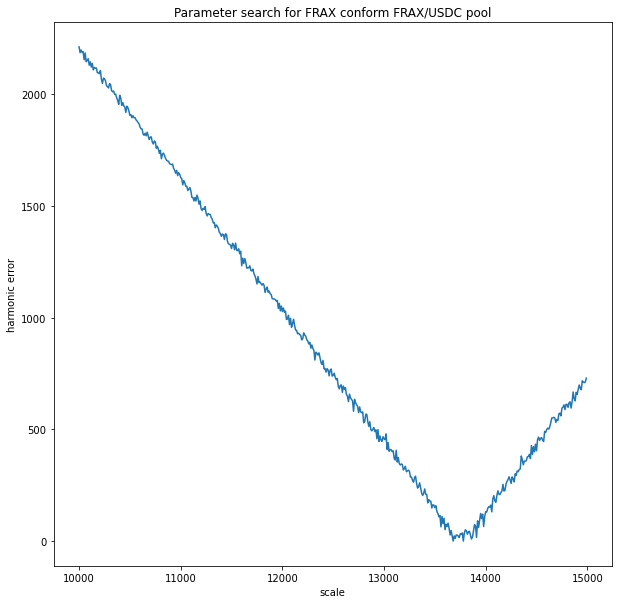

In [522]:
searcher = ParameterSearcher(CauchyGenerator(loc=0, scale=15000, limit=1400000), th.user_in_swap_df, "FRAX")

searcher.search_parameters(initial_scale=10000, step=10, final_scale=15000, acc=1000, 
                            title='Parameter search for FRAX conform FRAX/USDC pool')

cauchy min token in = 8.910374021524264
cauchy max token in = 1225823.3603837977


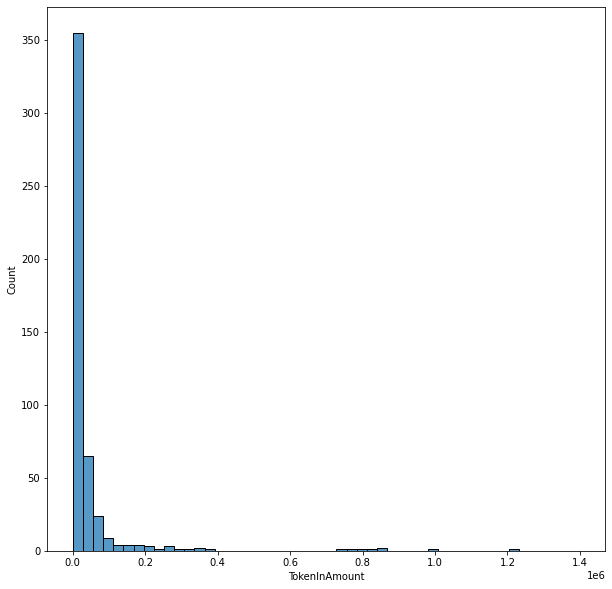

cauchy min token in = 8.910374021524264
cauchy max token in = 1362127.0461316232


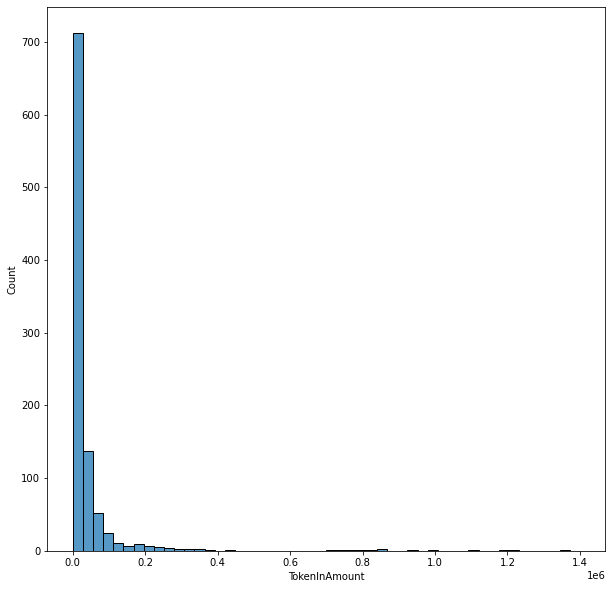

In [74]:
cauchy_simulation = MonteCarloTransactionSimulator(frequency_generator=PoissonGenerator(cycle_size=60000, mean_occurencies=0.05056337668310381),
                                                    token_in_generator=CauchyGenerator(0, 13780, 1400000),
                                                    first_currency="first", second_currency="second")

generator_week_df_and_plot(simulator=cauchy_simulation, time_window=60*24*7, x_size=10, y_size=10, x_bin_limit=1400000)

(0.5881769681984061, 14090)


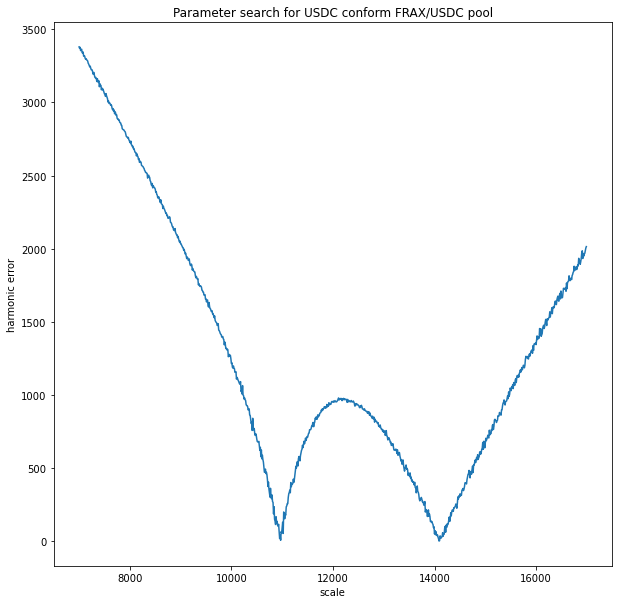

In [527]:
searcher = ParameterSearcher(CauchyGenerator(loc=0, scale=15000, limit=1400000), th.user_in_swap_df, "USDC")

searcher.search_parameters(initial_scale=7000, step=10, final_scale=17000, acc=1000, 
                            title='Parameter search for USDC conform FRAX/USDC pool')

cauchy min token in = 146.3550534599493
cauchy max token in = 1243568.7121180822


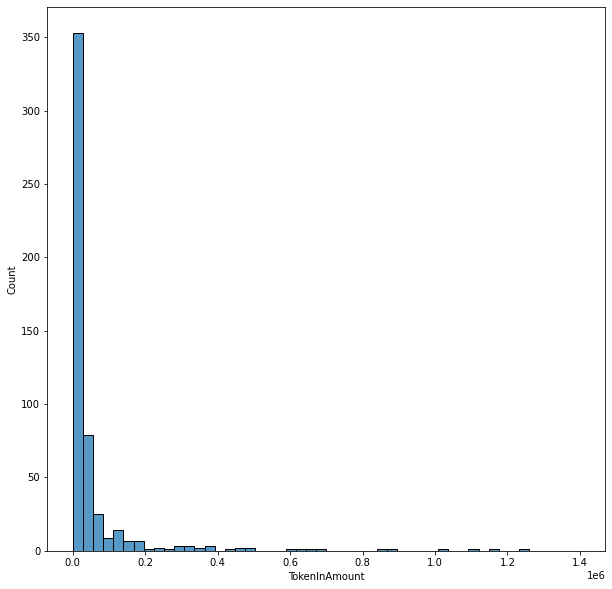

In [528]:
cauchy_simulation = MonteCarloTransactionSimulator(frequency_generator=PoissonGenerator(cycle_size=60000, mean_occurencies=0.05056337668310381),
                                                    token_in_generator=CauchyGenerator(0, 14090, 1400000),
                                                    first_currency="first", second_currency="second")

generator_week_df_and_plot(simulator=cauchy_simulation, time_window=60*24*7, x_size=10, y_size=10, x_bin_limit=1400000)

['USDC' 'FRAX']


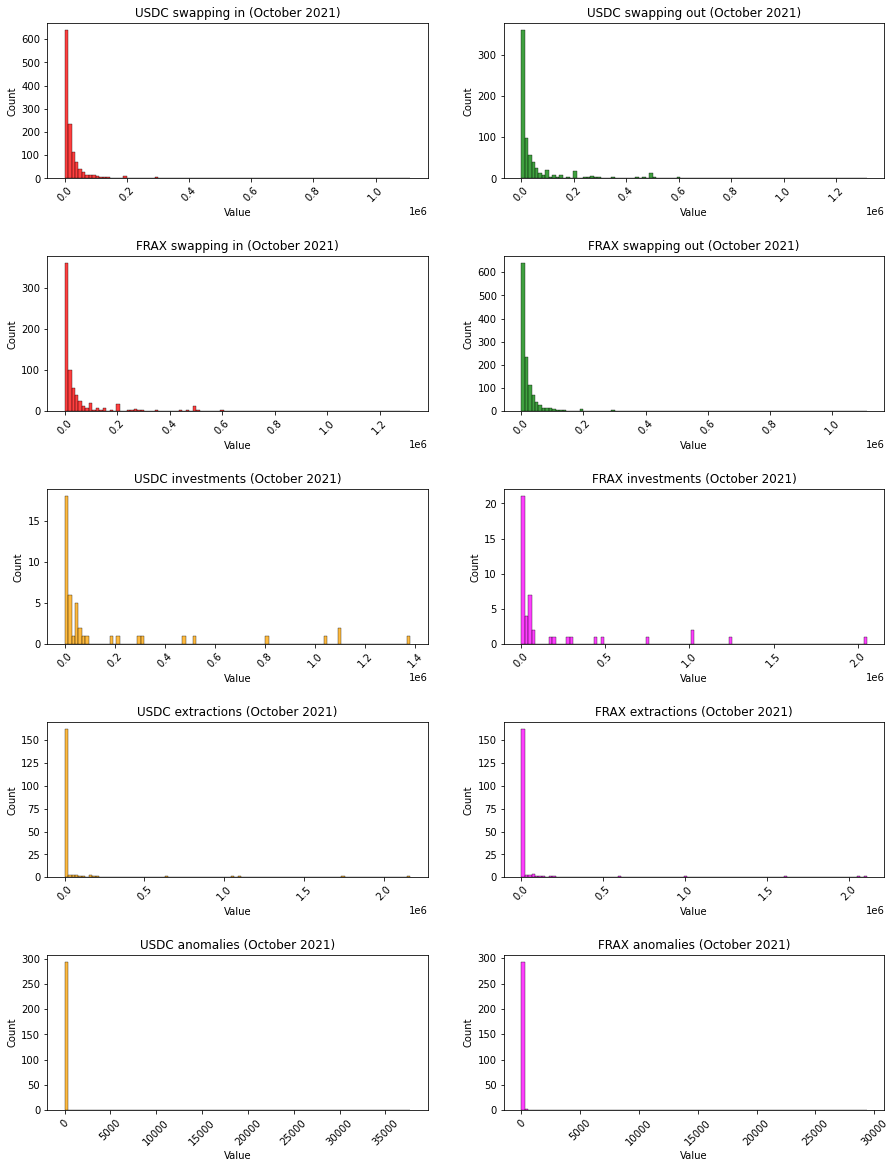

In [164]:
th.histplots_matrix(15, 20, 0.5, 0.2, 'October 2021', 100)

['USDC' 'FRAX']


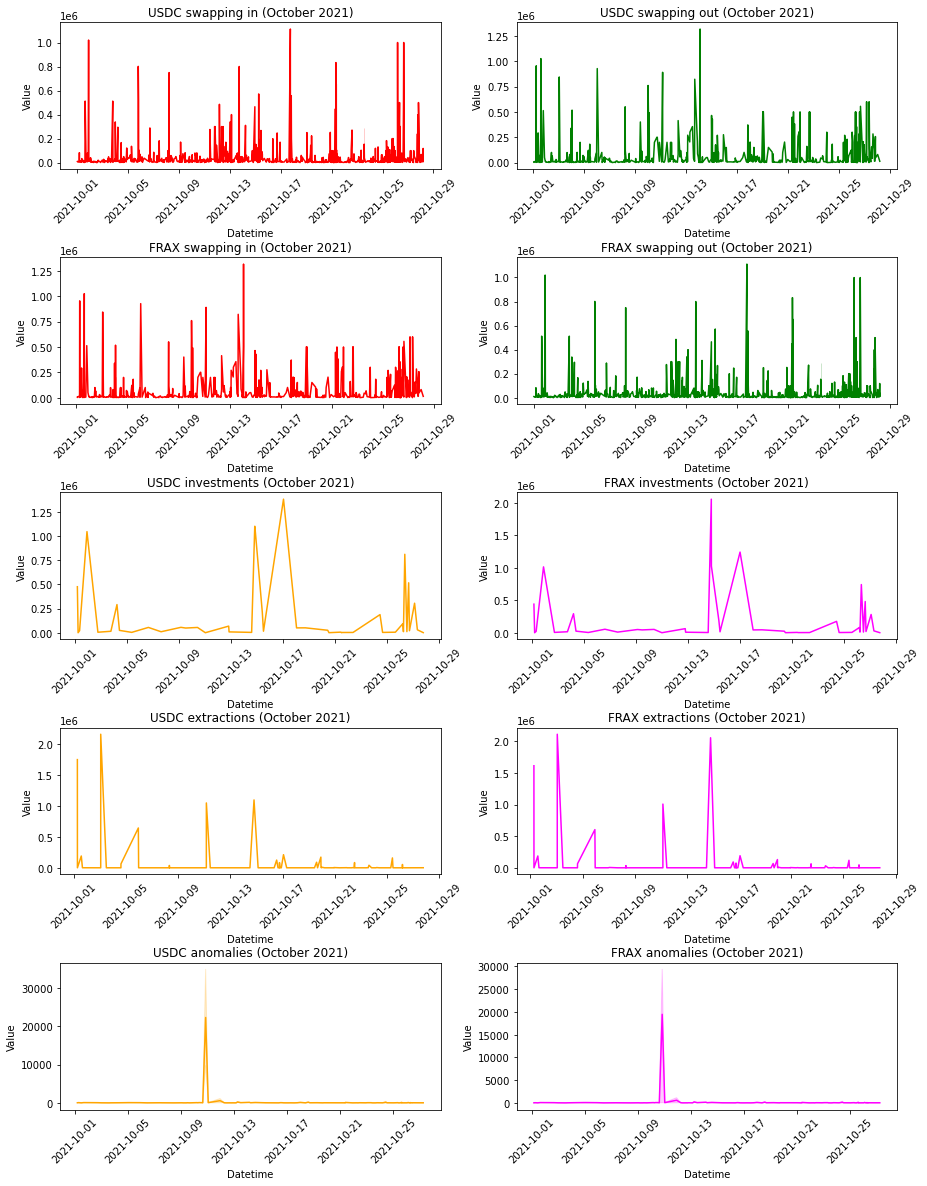

In [163]:
th.lineplots_matrix(15, 20, 0.6, 0.2, 'October 2021')

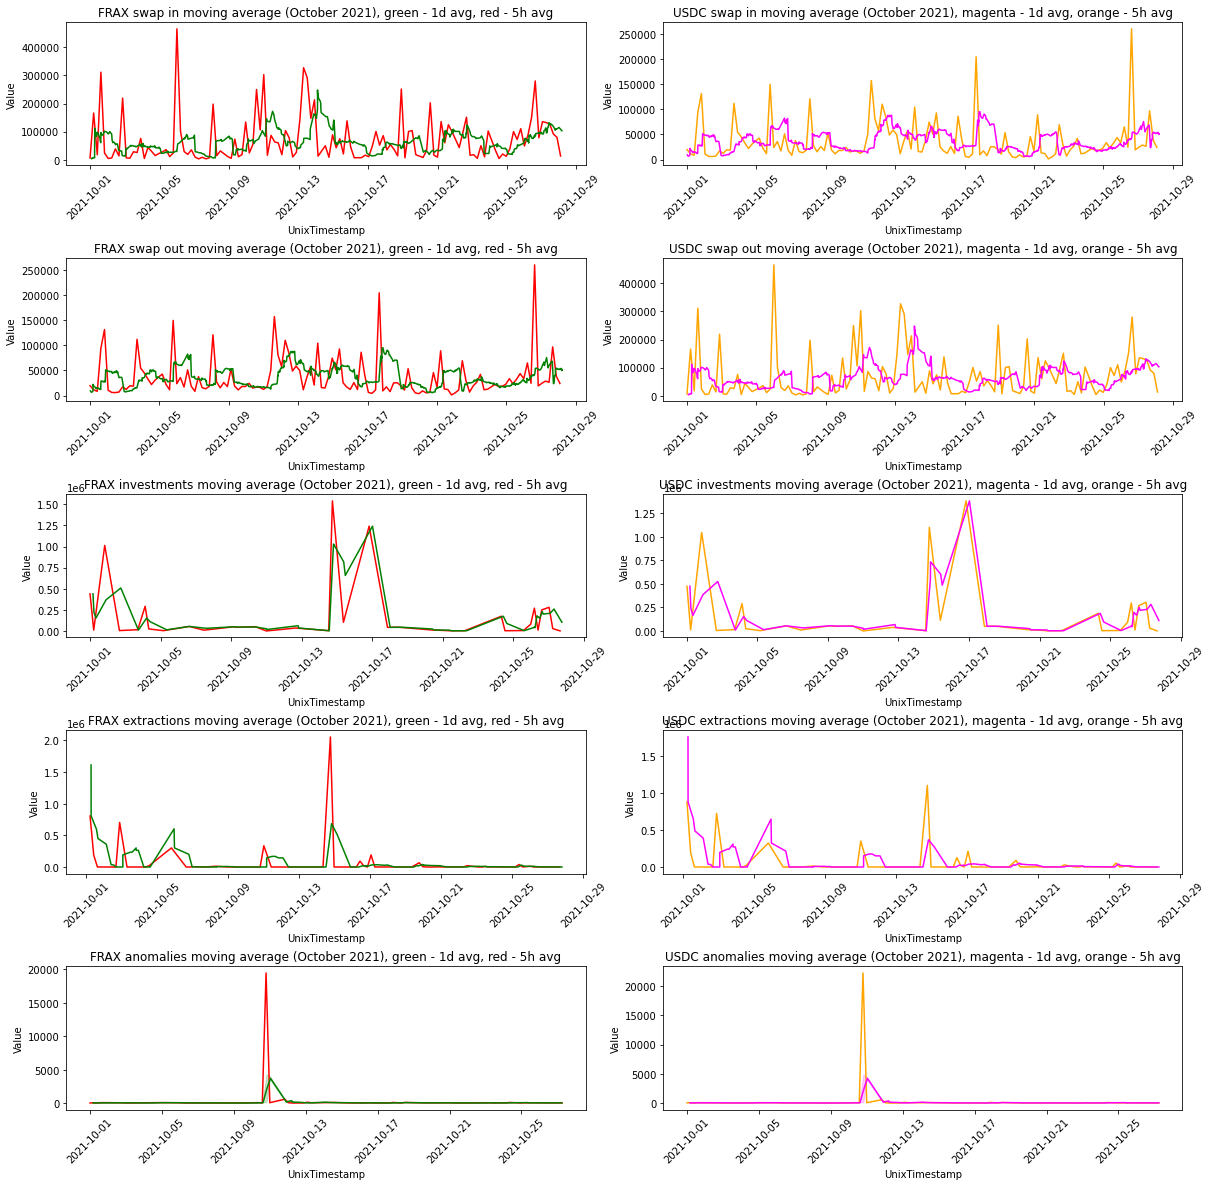

In [165]:
th.lineplots_moving_averages_matrix_by_token(20, 20, 0.65, 0.15, 'FRAX', 'USDC', 'October 2021', '5h', '1d')

# Medium capitalization

## DAI/USDT

Total tokens locked (checked at 2-nd November 2021):
* DAI = 14.98 m
* USDT = 4.24 m

Target price:
* 1 DAI = 0.9996 USDT, 
* 1 USDT = 1.0004 DAI

Actual price:
* 1 DAI = 0.9994 USDC
* 1 USDC = 1.0006 DAI

In [18]:
# read transaction history
dai_usdt_df = pd.read_csv(os.getcwd() + "\stress_test_sim\pools_history\csv_tables\low_DAI-USDT_01-10_31-10.csv", index_col=False)

# make sure that Value will be interpreted as floating point number, remove possible 0 value elements
dai_usdt_df.Value = dai_usdt_df.Value.str.replace(",", "")
dai_usdt_df.Value = dai_usdt_df.Value.astype("float")
dai_usdt_df = dai_usdt_df[dai_usdt_df.Value > 0]

# make sure that datetime parameter is interpreted as date
dai_usdt_df['Datetime'] = pd.to_datetime(dai_usdt_df['UnixTimestamp'], unit='s')

# form transaction history separated by categories
th = TransactionHistory()
th.classify_history(dai_usdt_df)

In [19]:
th.show_transactions_frequencies_per_minute()
th.show_min_max_values_by_token()

Swapping in DAI transactions frequency: 0.04485194887671668
Swapping in USDT transactions frequency: 0.0529888068587759
Swapping out transactions frequency: 0.09784075573549257
Investitions frequency: 0.00035312515764515965
Extractions frequency: 0.000774593338497289
swapping in DAI min = 0.33902104845606373
swapping in DAI max = 2000579.3712
swapping out DAI min = 2.0
swapping out DAI max = 3209682.017592722
swapping in USDT min = 2.001638
swapping in USDT max = 3213476.385326
swapping out USDT min = 0.338931
swapping out USDT max = 2000208.672366


(0.1804091034166397, 6070)


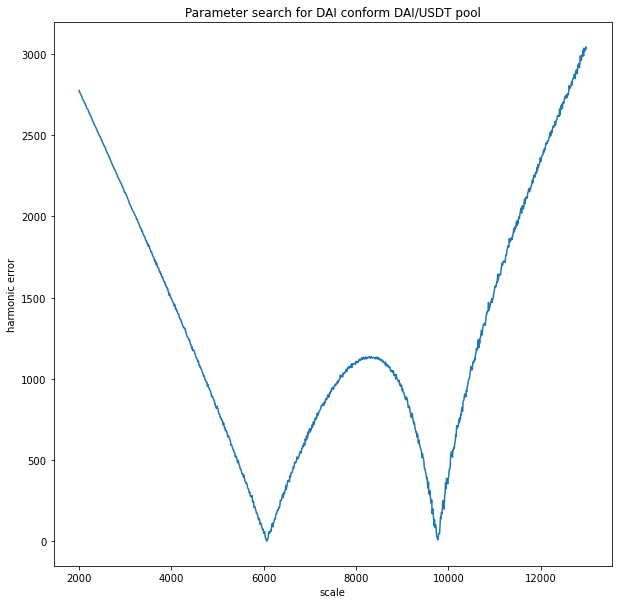

In [535]:
searcher = ParameterSearcher(CauchyGenerator(loc=0, scale=15000, limit=2500000), th.user_in_swap_df, "DAI")

searcher.search_parameters(initial_scale=2000, step=10, final_scale=13000, acc=1000, 
                            title='Parameter search for DAI conform DAI/USDT pool')

cauchy min token in = 0.8295280830859415
cauchy max token in = 2467923.3711418733


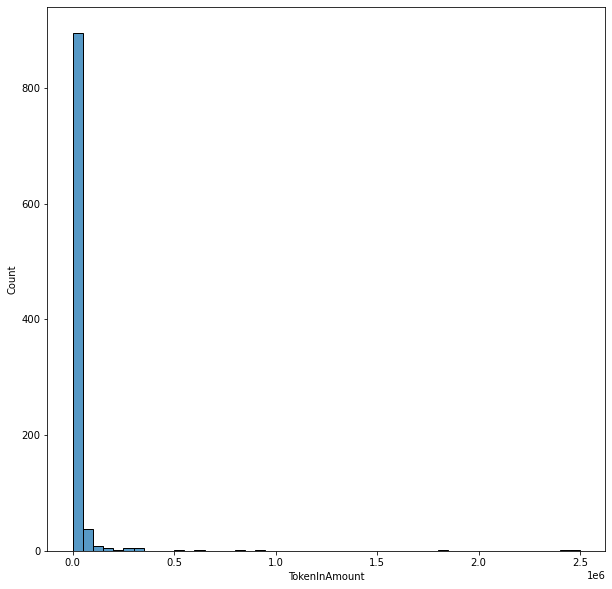

In [536]:
cauchy_simulation = MonteCarloTransactionSimulator(frequency_generator=PoissonGenerator(cycle_size=60000, mean_occurencies=0.09784075573549257),
                                                    token_in_generator=CauchyGenerator(0, 6070, 2500000),
                                                    first_currency="first", second_currency="second")

generator_week_df_and_plot(simulator=cauchy_simulation, time_window=60*24*7, x_size=10, y_size=10, x_bin_limit=2500000)

(3.845624360788176, 7130)


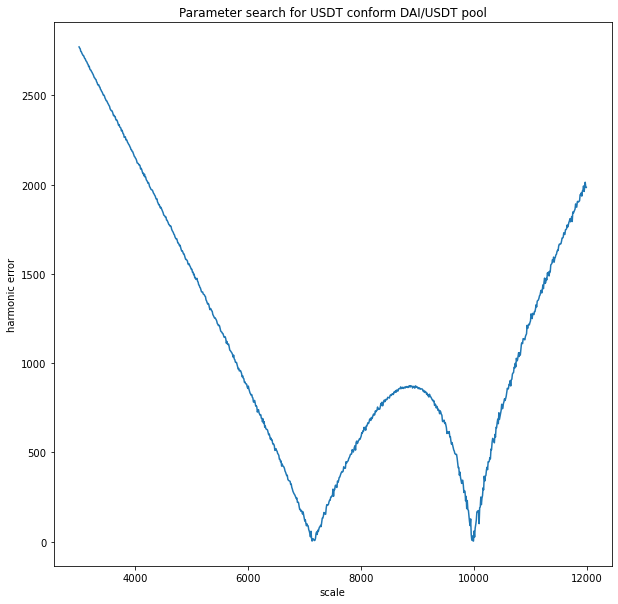

In [538]:
searcher = ParameterSearcher(CauchyGenerator(loc=0, scale=15000, limit=3400000), th.user_in_swap_df, "USDT")

searcher.search_parameters(initial_scale=3000, step=10, final_scale=12000, acc=1000, 
                            title='Parameter search for USDT conform DAI/USDT pool')

cauchy min token in = 4.163704724059079
cauchy max token in = 3165016.184388459


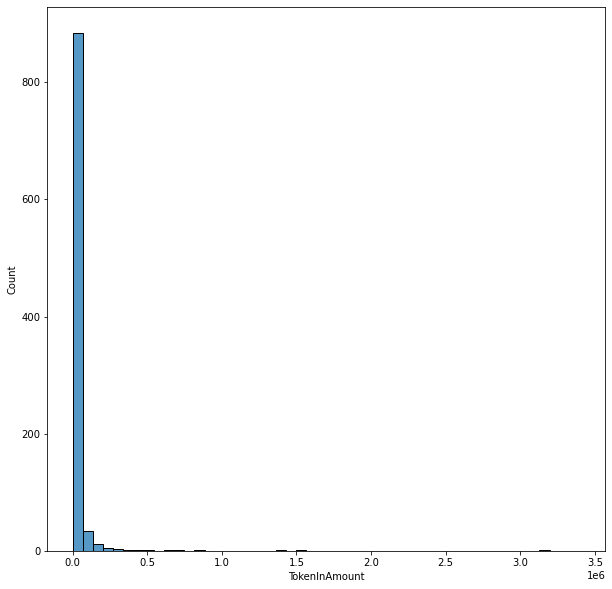

In [539]:
cauchy_simulation = MonteCarloTransactionSimulator(frequency_generator=PoissonGenerator(cycle_size=60000, mean_occurencies=0.09784075573549257),
                                                    token_in_generator=CauchyGenerator(0, 7130, 3400000),
                                                    first_currency="first", second_currency="second")

generator_week_df_and_plot(simulator=cauchy_simulation, time_window=60*24*7, x_size=10, y_size=10, x_bin_limit=3400000)

['DAI' 'USDT']


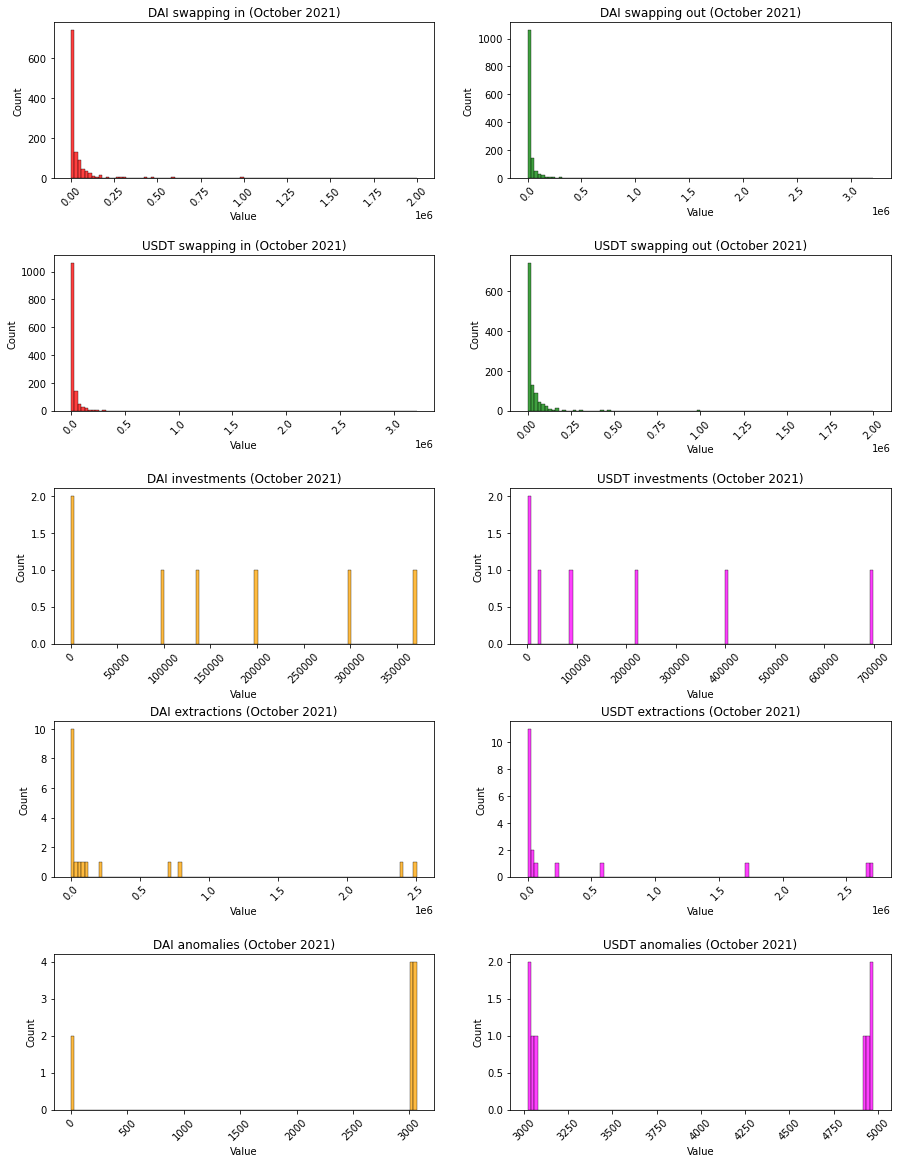

In [168]:
th.histplots_matrix(15, 20, 0.5, 0.2, 'October 2021', 100)

['DAI' 'USDT']


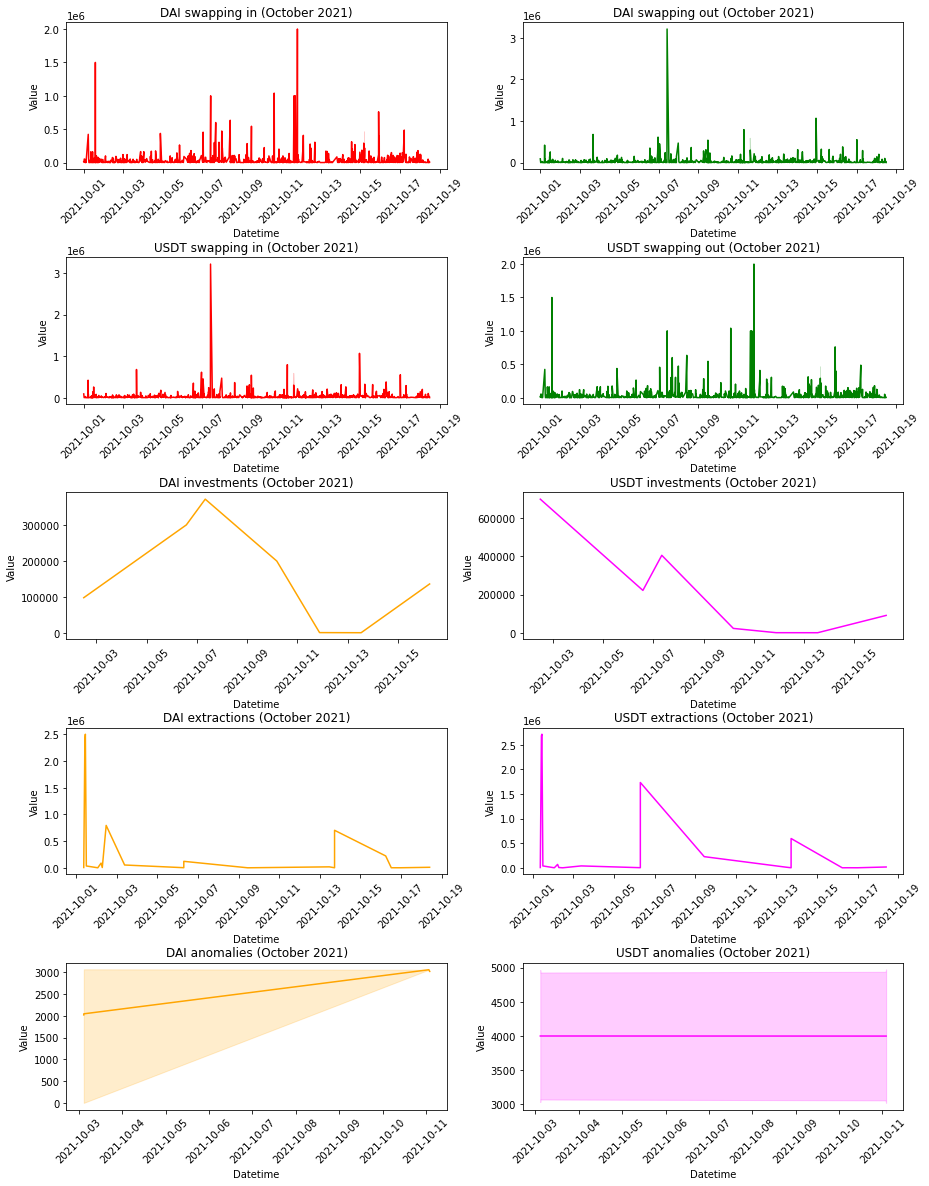

In [167]:
th.lineplots_matrix(15, 20, 0.6, 0.2, 'October 2021')

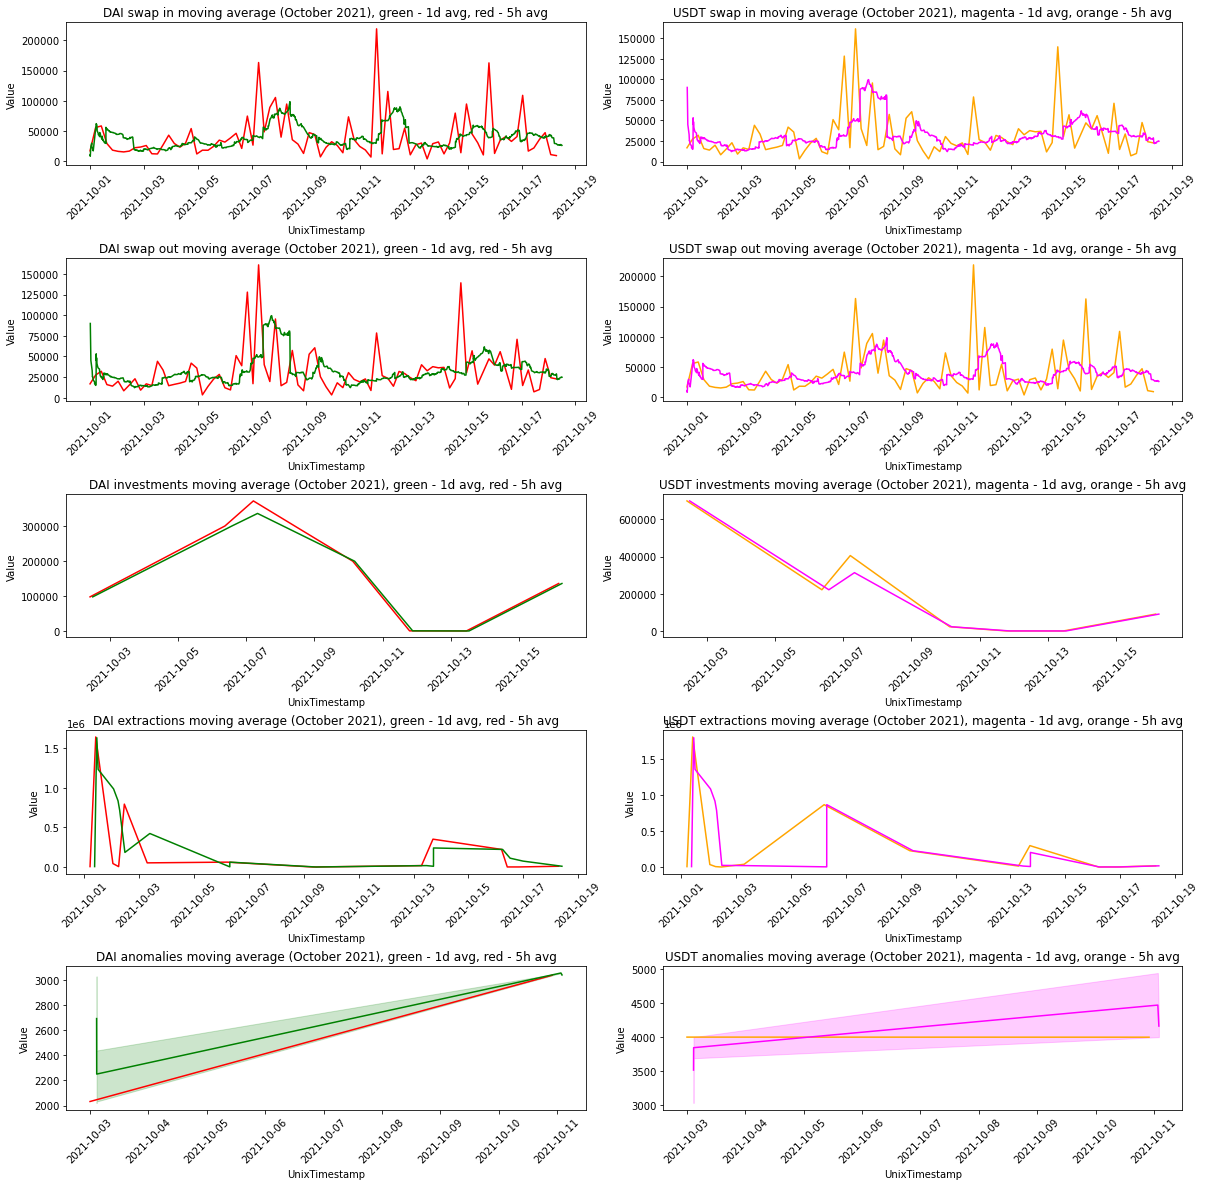

In [169]:
th.lineplots_moving_averages_matrix_by_token(20, 20, 0.65, 0.15, 'DAI', 'USDT', 'October 2021', '5h', '1d')

## FEI/USDC

Total tokens locked (checked at 6-th November 2021):

* FEI = 18.09 m
* USDC = 15.96 m

Target price:

* 1 FEI = 1.0008 USDC
* 1 USDC = 0.9992 FEI

Actual price:

* 1 FEI = 1.0004 USDC
* 1 USDC = 0.9996 FEI

In [6]:
# read transaction history
fei_usdc_df = pd.read_csv(os.getcwd() + "\stress_test_sim\pools_history\low_FEI-USDC_01-10_31-10.csv", index_col=False)

# make sure that Value will be interpreted as floating point number, remove possible 0 value elements
fei_usdc_df.Value = fei_usdc_df.Value.str.replace(",", "")
fei_usdc_df.Value = fei_usdc_df.Value.astype("float")
fei_usdc_df = fei_usdc_df[fei_usdc_df.Value > 0]

# make sure that datetime parameter is interpreted as date
fei_usdc_df['Datetime'] = pd.to_datetime(fei_usdc_df['UnixTimestamp'], unit='s')

# form transaction history separated by categories
th = TransactionHistory()
th.classify_history(fei_usdc_df)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\workspace\\stress_test_sim\\pools_history\\csv_tables\\low_FEI-USDC_01-01_31-10.csv'

In [21]:
th.show_transactions_frequencies_per_minute()
th.show_min_max_values_by_token()

Swapping in FEI transactions frequency: 0.028535069257500857
Swapping in USDC transactions frequency: 0.028681904948362782
Swapping out transactions frequency: 0.057216974205863635
Investitions frequency: 0.0008301934989462928
Extractions frequency: 0.0008211736466426632
swapping in FEI min = 100.0
swapping in FEI max = 7780911.89721531
swapping out FEI min = 14.998580434761719
swapping out FEI max = 4066677.876992277
swapping in USDC min = 15.0
swapping in USDC max = 4066715.928794
swapping out USDC min = 99.944163
swapping out USDC max = 7783532.973158


(4.247054830672393, 124640)


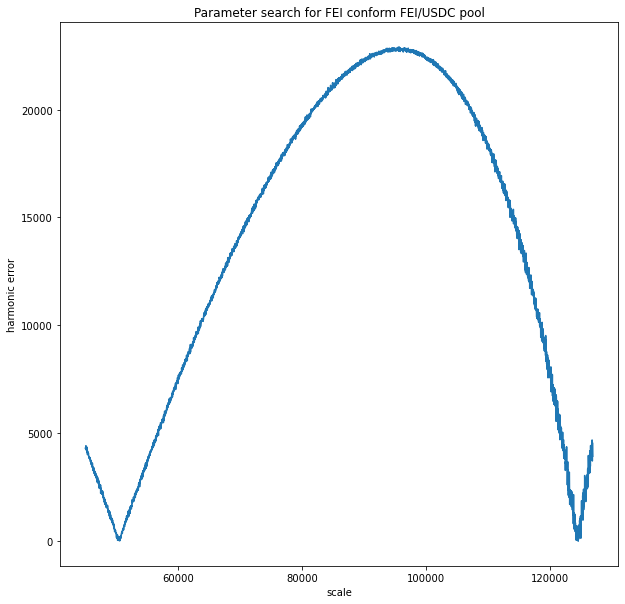

In [548]:
searcher = ParameterSearcher(CauchyGenerator(loc=0, scale=15000, limit=7800000), th.user_in_swap_df, "FEI")

searcher.search_parameters(initial_scale=45000, step=20, final_scale=127000, acc=1000, 
                            title='Parameter search for FEI conform FEI/USDC pool')

cauchy min token in = 572.2576247722745
cauchy max token in = 7548054.169775804


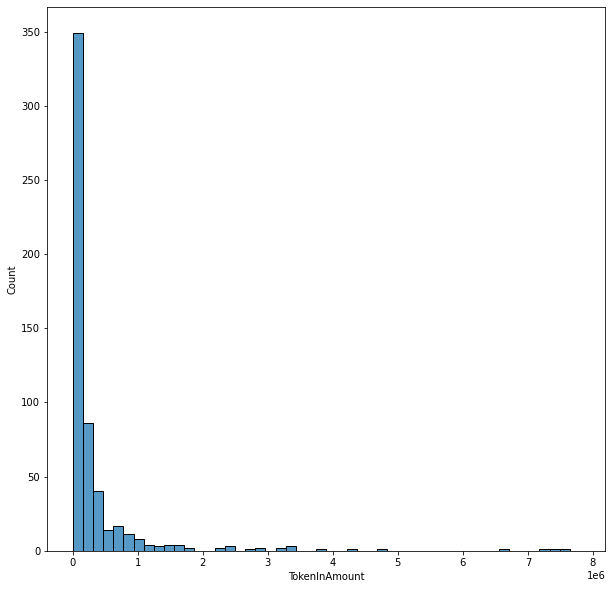

In [73]:
cauchy_simulation = MonteCarloTransactionSimulator(frequency_generator=PoissonGenerator(cycle_size=60000, mean_occurencies=0.057216974205863635),
                                                    token_in_generator=CauchyGenerator(0, 124640, 7800000),
                                                    first_currency="first", second_currency="second")

generator_week_df_and_plot(simulator=cauchy_simulation, time_window=60*24*7, x_size=10, y_size=10, x_bin_limit=7800000)

(23.668290511398002, 213340)


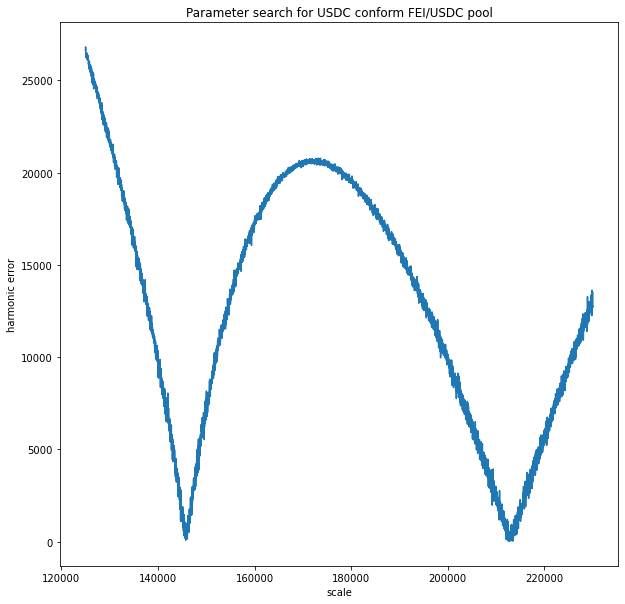

In [551]:
searcher = ParameterSearcher(CauchyGenerator(loc=0, scale=15000, limit=7800000), th.user_in_swap_df, "USDC")

searcher.search_parameters(initial_scale=125000, step=20, final_scale=230000, acc=1000, 
                            title='Parameter search for USDC conform FEI/USDC pool')

cauchy min token in = 1342.296513550532
cauchy max token in = 7763552.289661833


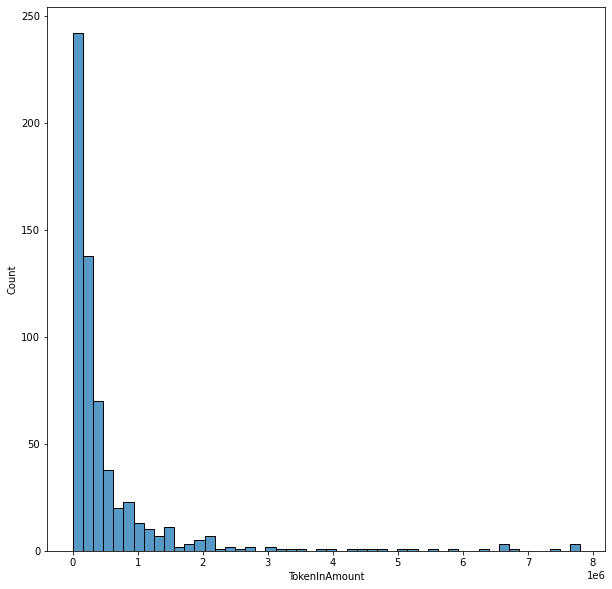

In [552]:
cauchy_simulation = MonteCarloTransactionSimulator(frequency_generator=PoissonGenerator(cycle_size=60000, mean_occurencies=0.057216974205863635),
                                                    token_in_generator=CauchyGenerator(0, 213340, 7800000),
                                                    first_currency="first", second_currency="second")

generator_week_df_and_plot(simulator=cauchy_simulation, time_window=60*24*7, x_size=10, y_size=10, x_bin_limit=7800000)

['FEI' 'USDC']


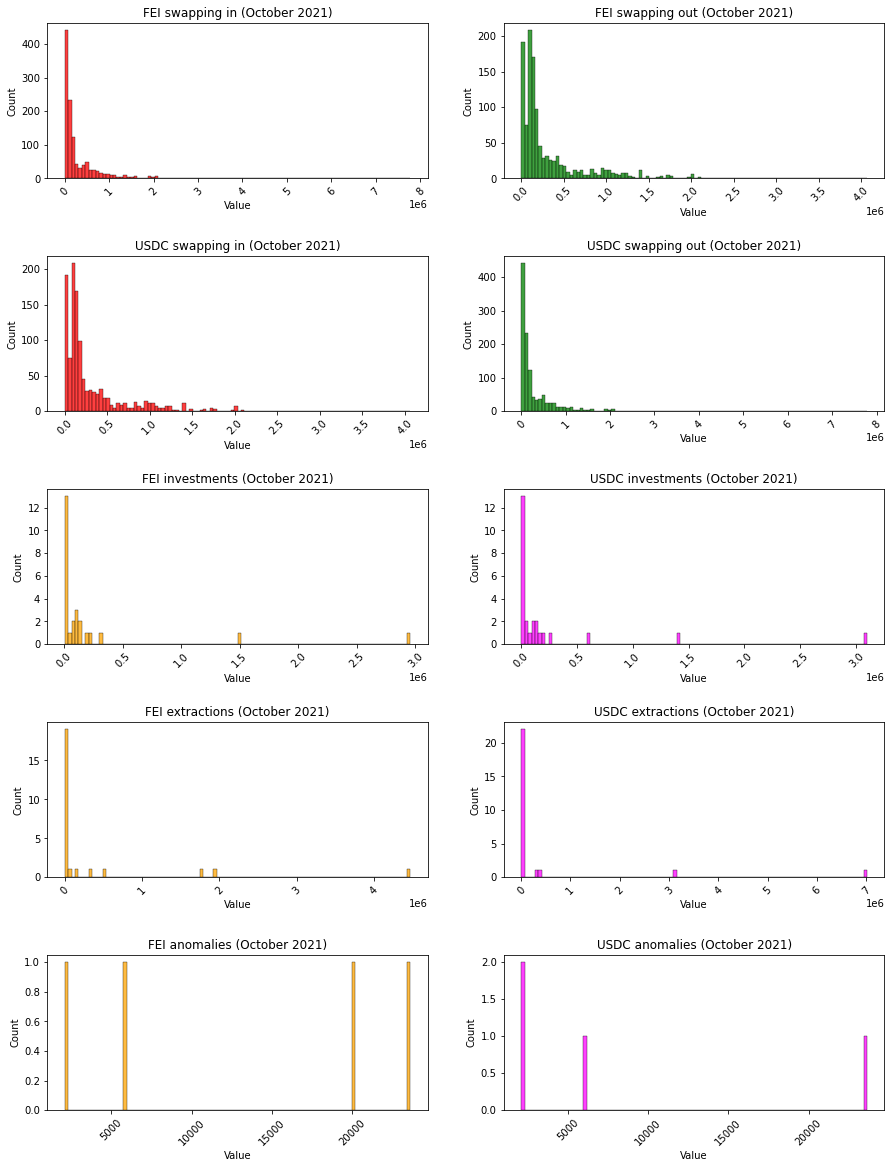

In [172]:
th.histplots_matrix(15, 20, 0.5, 0.2, 'October 2021', 100)

['FEI' 'USDC']


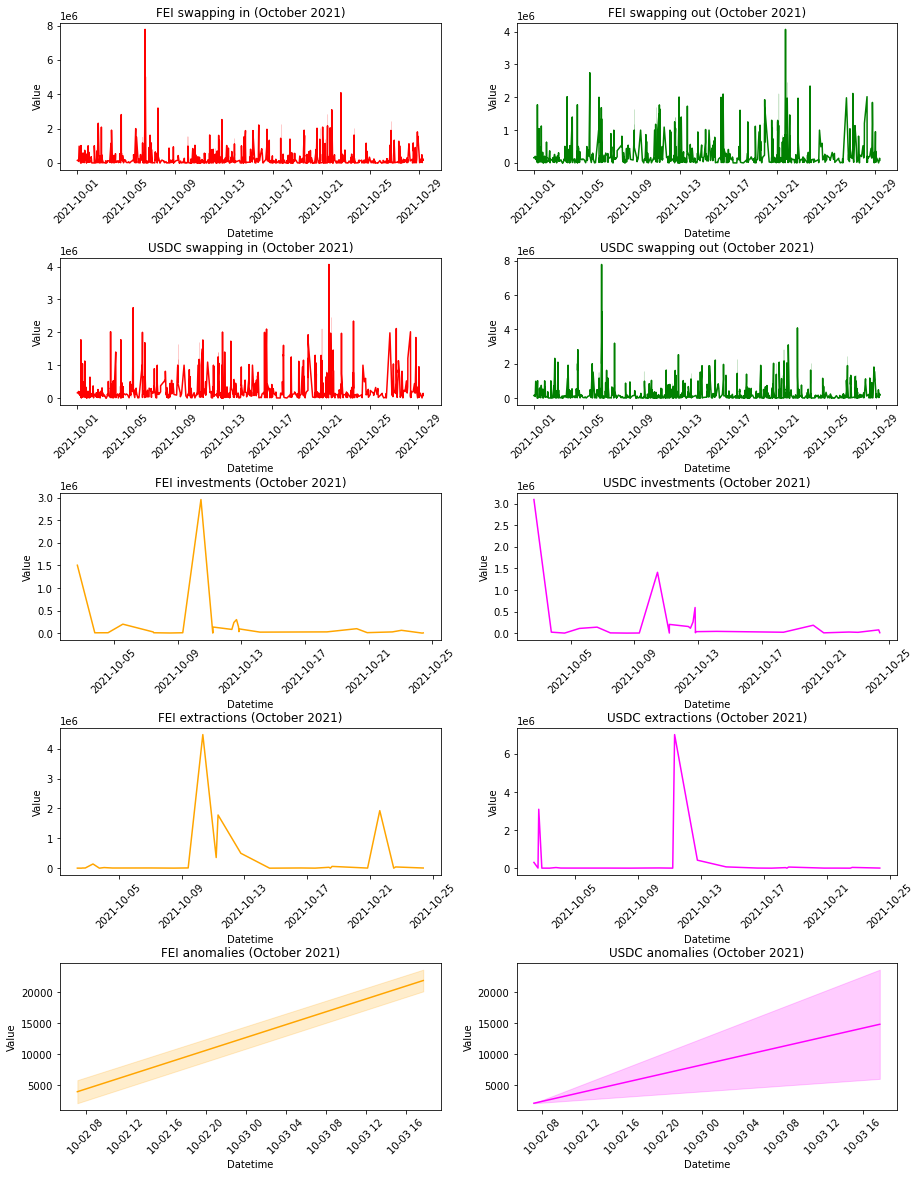

In [171]:
th.lineplots_matrix(15, 20, 0.6, 0.2, 'October 2021')

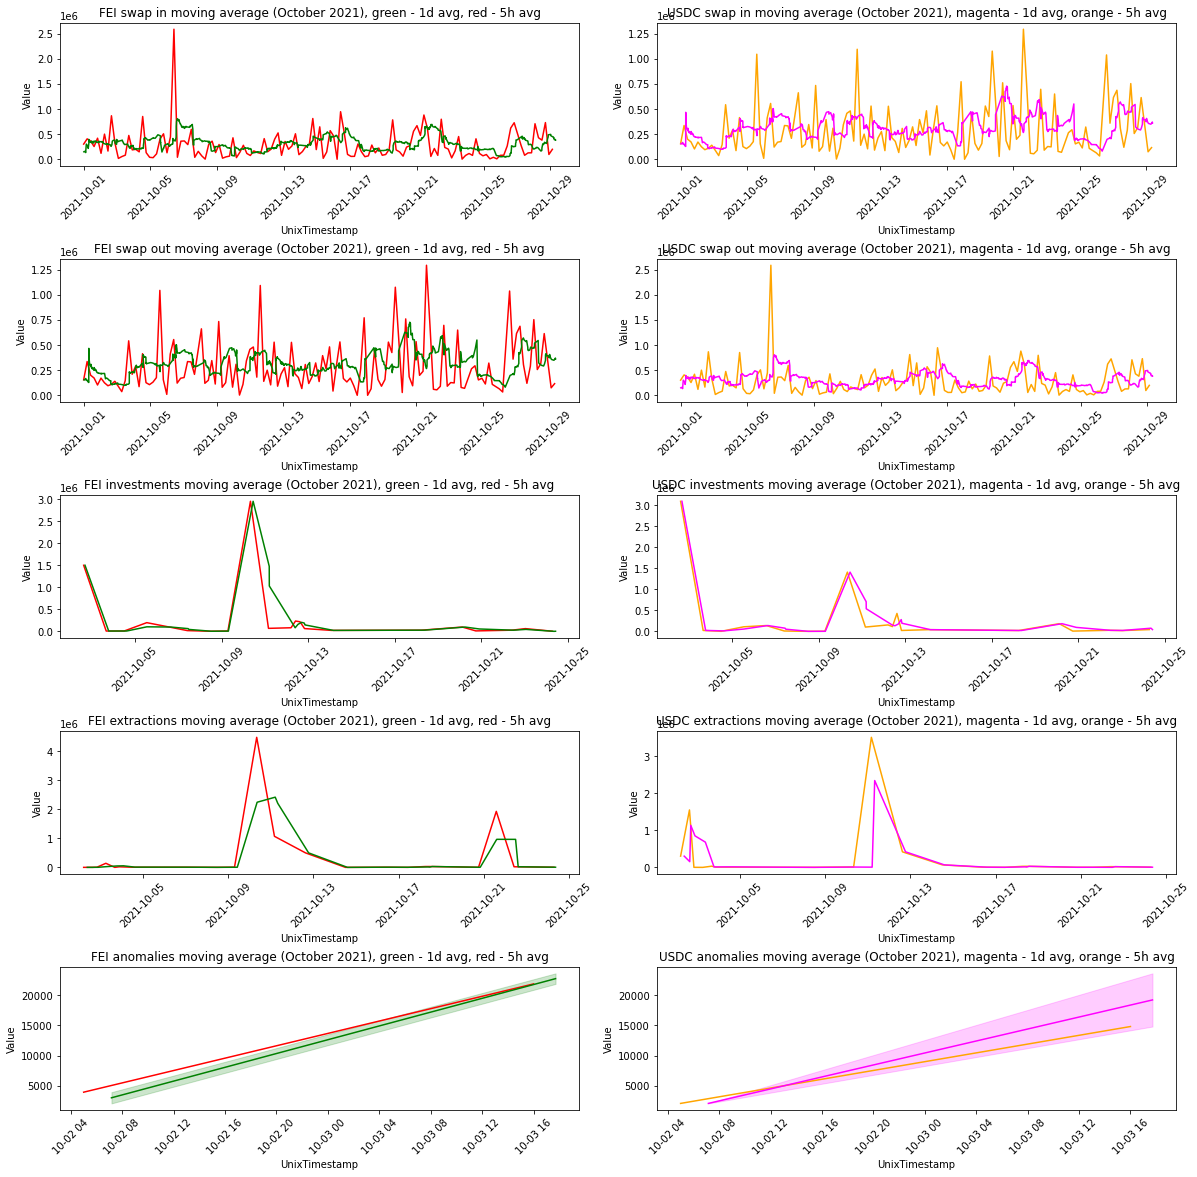

In [173]:
th.lineplots_moving_averages_matrix_by_token(20, 20, 0.65, 0.15, 'FEI', 'USDC', 'October 2021', '5h', '1d')

## PAX/USDC

Total tokens locked (checked at 6-th November 2021):

* PAX = 10.42 m
* USDC = 7.98 m

Target price:

* 1 PAX = 0.9993 USDC
* 1 USDC = 1.0007 PAX

Actual price:

* 1 PAX = 0.9984 USDC
* 1 USDC = 1.0016 PAX

In [22]:
# read transaction history
pax_usdc_df = pd.read_csv(os.getcwd() + "\stress_test_sim\pools_history\low_PAX-USDC_01-10_31-10.csv", index_col=False)

# make sure that Value will be interpreted as floating point number, remove possible 0 value elements
pax_usdc_df.Value = pax_usdc_df.Value.str.replace(",", "")
pax_usdc_df.Value = pax_usdc_df.Value.astype("float")
pax_usdc_df = pax_usdc_df[pax_usdc_df.Value > 0]

# make sure that datetime parameter is interpreted as date
pax_usdc_df['Datetime'] = pd.to_datetime(pax_usdc_df['UnixTimestamp'], unit='s')

# form transaction history separated by categories
th = TransactionHistory()
th.classify_history(pax_usdc_df)

In [23]:
th.show_min_max_values_by_token()
th.show_transactions_frequencies_per_minute()

swapping in USDC min = 500.0
swapping in USDC max = 689542.12188
swapping out USDC min = 30.491295
swapping out USDC max = 1199082.064141
swapping in USDP min = 30.506171000008397
swapping in USDP max = 1200000.0
swapping out USDP min = 499.5706333222789
swapping out USDP max = 689201.9502073055
Swapping in USDC transactions frequency: 0.004990858328803676
Swapping in USDP transactions frequency: 0.003928447892474181
Swapping out transactions frequency: 0.008919306221277857


ZeroDivisionError: float division by zero

(1.7096847897872116, 51500)


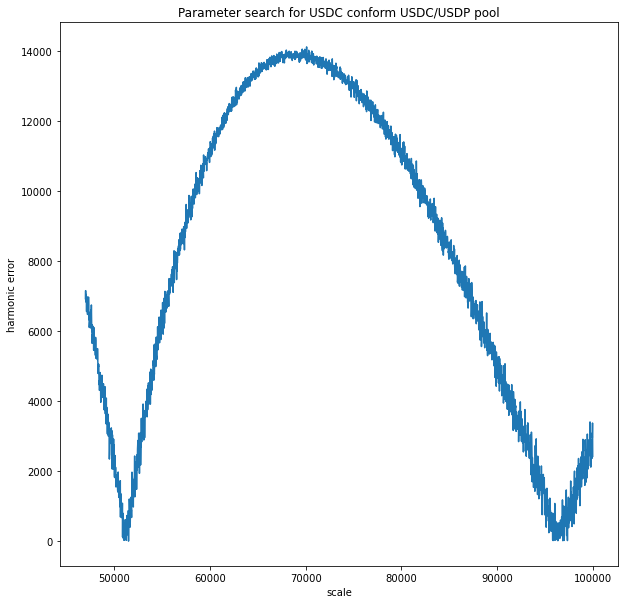

In [560]:
searcher = ParameterSearcher(CauchyGenerator(loc=0, scale=15000, limit=1300000), th.user_in_swap_df, "USDC")

searcher.search_parameters(initial_scale=47000, step=20, final_scale=100000, acc=1000, 
                            title='Parameter search for USDC conform USDC/USDP pool')

cauchy min token in = 1572.4327135158837
cauchy max token in = 1292531.6904221892


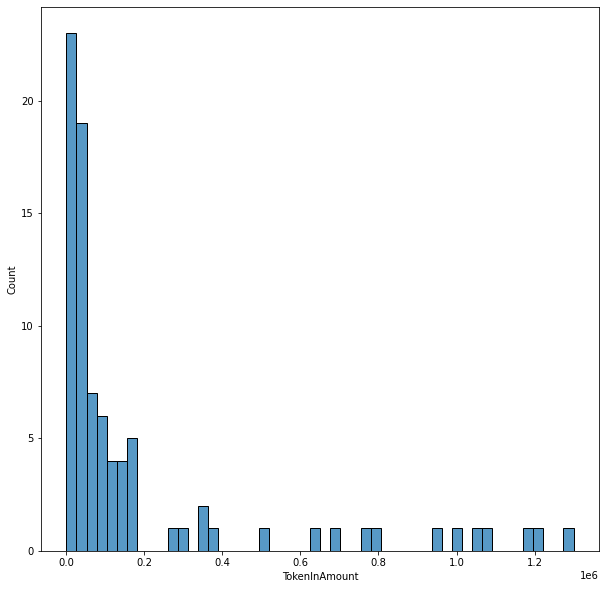

In [72]:
cauchy_simulation = MonteCarloTransactionSimulator(frequency_generator=PoissonGenerator(cycle_size=60000, mean_occurencies=0.008919306221277857),
                                                    token_in_generator=CauchyGenerator(0, 51500, 1300000),
                                                    first_currency="first", second_currency="second")

generator_week_df_and_plot(simulator=cauchy_simulation, time_window=60*24*7, x_size=10, y_size=10, x_bin_limit=1300000)

(1.1111932728758702, 82340)


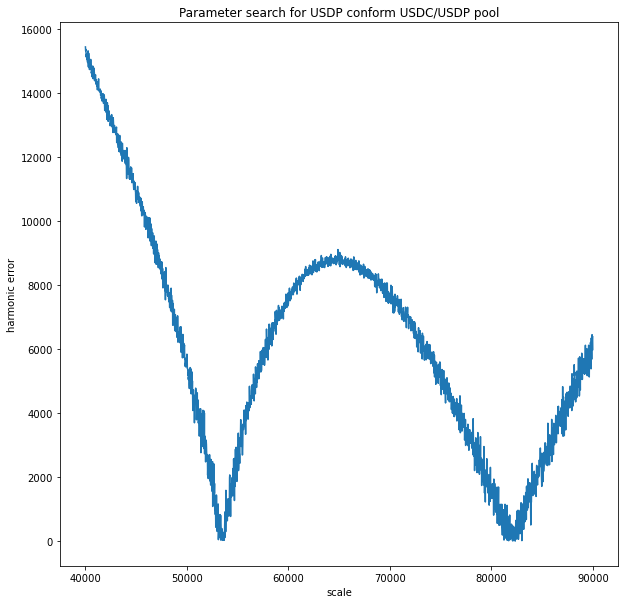

In [564]:
searcher = ParameterSearcher(CauchyGenerator(loc=0, scale=15000, limit=1300000), th.user_in_swap_df, "USDP")

searcher.search_parameters(initial_scale=40000, step=20, final_scale=90000, acc=1000, 
                            title='Parameter search for USDP conform USDC/USDP pool')

cauchy min token in = 2105.251258823458
cauchy max token in = 1291679.738310309


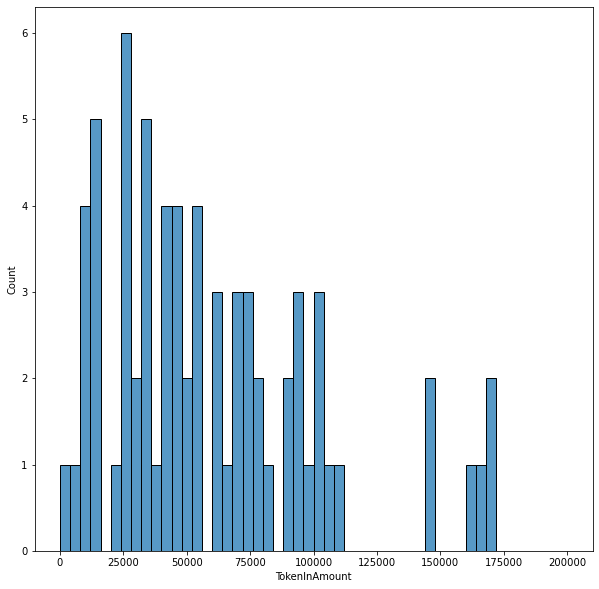

In [574]:
cauchy_simulation = MonteCarloTransactionSimulator(frequency_generator=PoissonGenerator(cycle_size=60000, mean_occurencies=0.008919306221277857),
                                                    token_in_generator=CauchyGenerator(0, 82340, 1300000),
                                                    first_currency="first", second_currency="second")

generator_week_df_and_plot(simulator=cauchy_simulation, time_window=60*24*7, x_size=10, y_size=10, x_bin_limit=1300000)

['USDC' 'USDP']


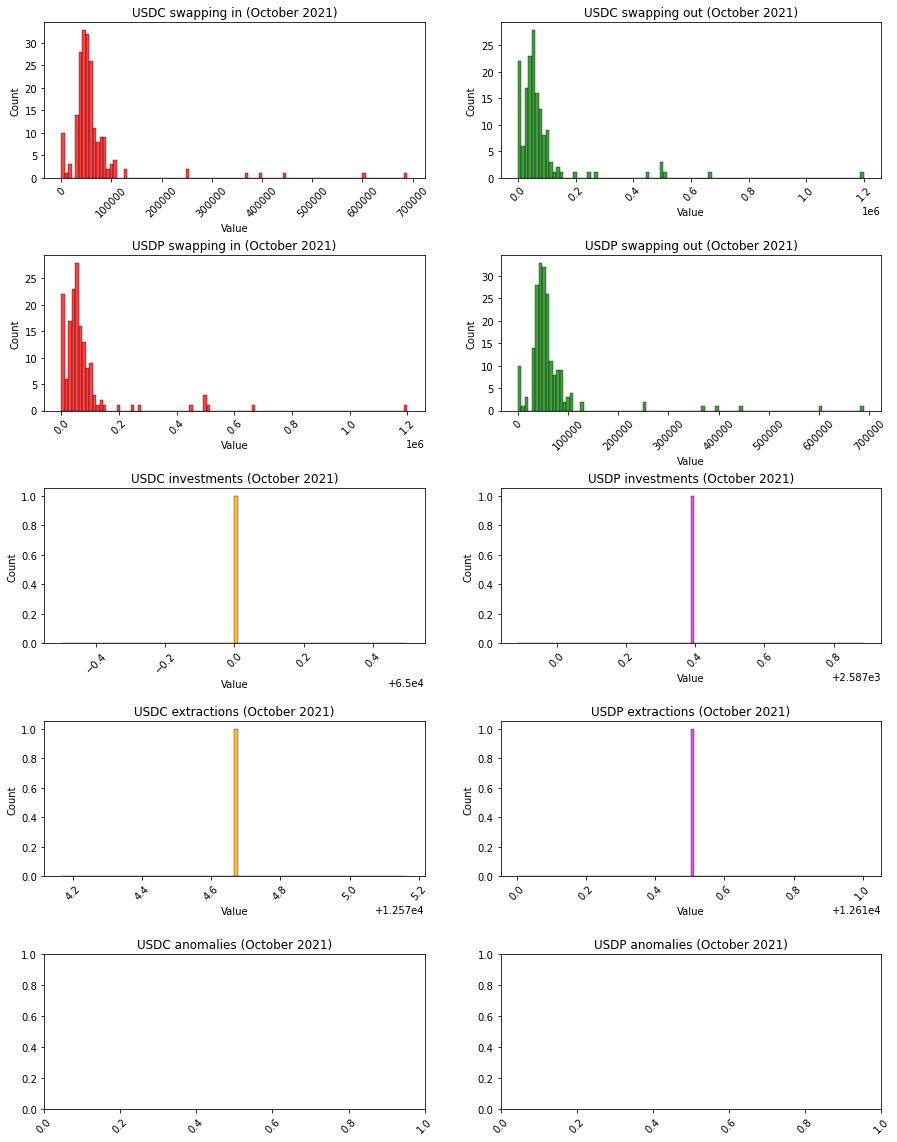

In [176]:
th.histplots_matrix(15, 20, 0.5, 0.2, 'October 2021', 100)

['USDC' 'USDP']


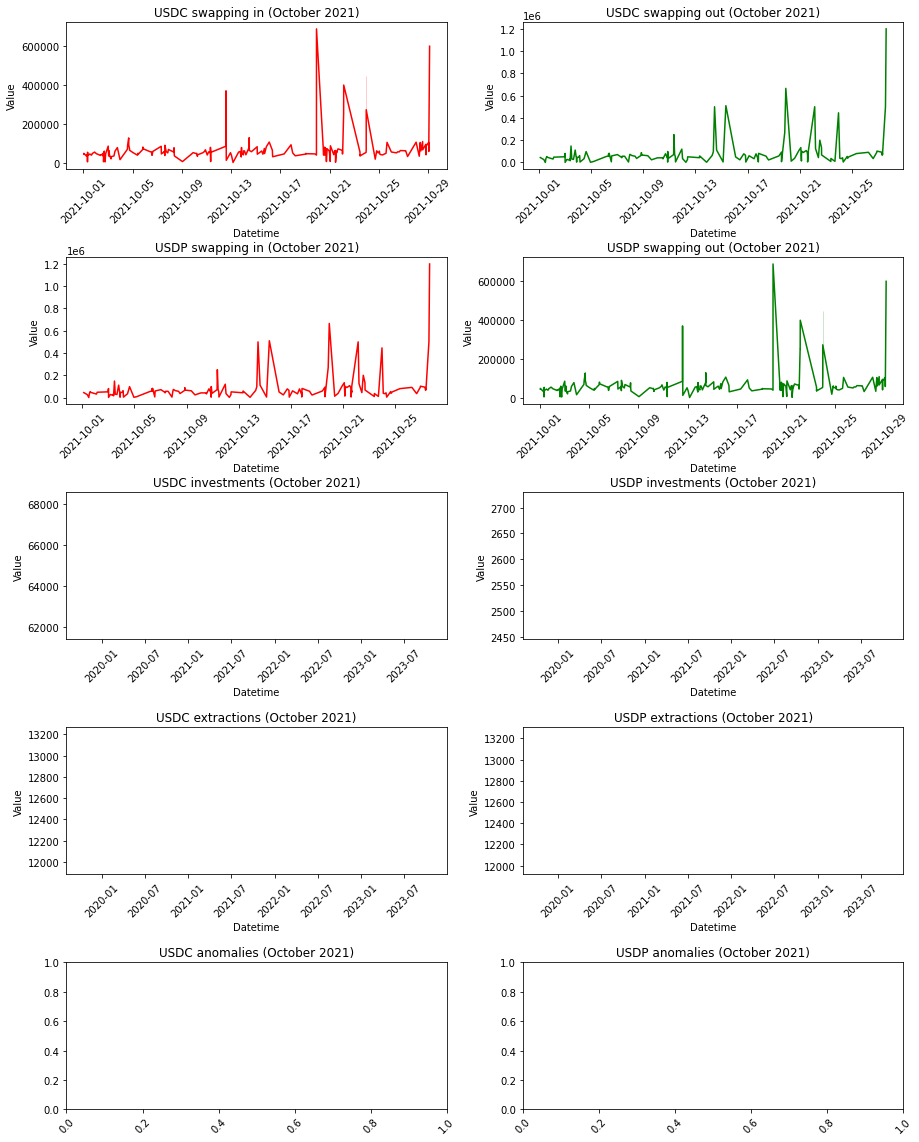

In [175]:
th.lineplots_matrix(15, 20, 0.6, 0.2, 'October 2021')

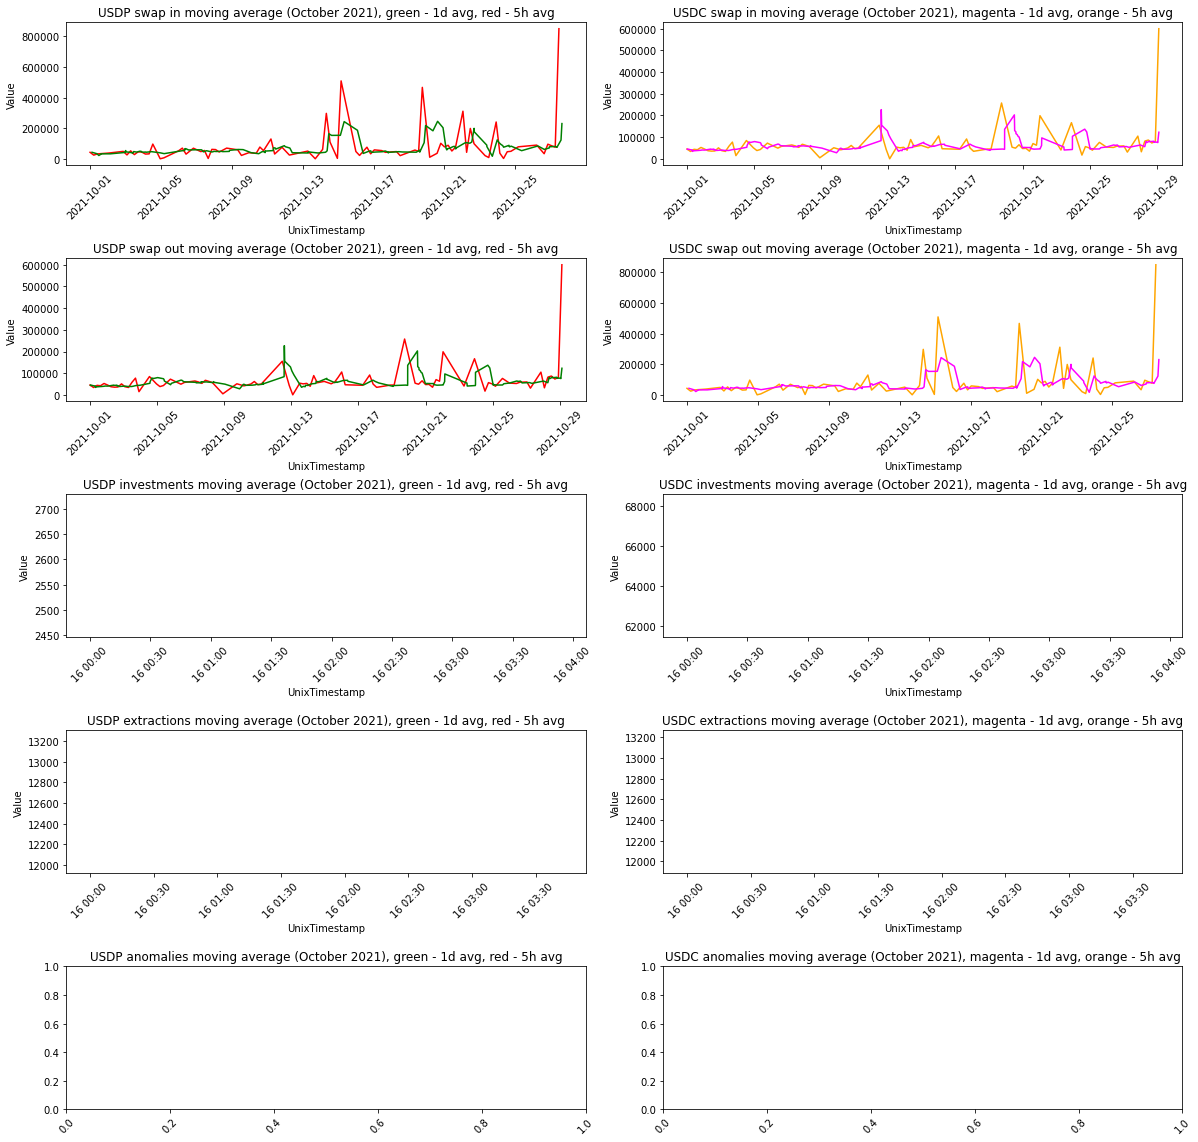

In [177]:
th.lineplots_moving_averages_matrix_by_token(20, 20, 0.65, 0.15, 'USDP', 'USDC', 'October 2021', '5h', '1d')

## WBTC/USDT

Total tokens locked (checked at 6-th November 2021):

* WBTC = 62.91
* USDT = 14.04 m

Target price:

* 1 WBTC = 61.04 k USDT
* 1 USDT = <0.001 WBTC

Actual price:

* 1 WBTC = 61 013.4437 USDT
* 1 USDT = ? 0 WBTC (price is so small, that uniswap is not able to show it, it's strange)

In [25]:
# read transaction history
wbtc_usdt_df = pd.read_csv(os.getcwd() + "\stress_test_sim\pools_history\low_WBTC-USDT_01-10_31-10.csv", index_col=False)

# make sure that Value will be interpreted as floating point number, remove possible 0 value elements
wbtc_usdt_df.Value = wbtc_usdt_df.Value.str.replace(",", "")
wbtc_usdt_df.Value = wbtc_usdt_df.Value.astype("float")
wbtc_usdt_df = wbtc_usdt_df[wbtc_usdt_df.Value > 0]

# make sure that datetime parameter is interpreted as date
wbtc_usdt_df['Datetime'] = pd.to_datetime(wbtc_usdt_df['UnixTimestamp'], unit='s')

# form transaction history separated by categories
th = TransactionHistory()
th.classify_history(wbtc_usdt_df)

In [26]:
th.show_transactions_frequencies_per_minute()
th.show_min_max_values_by_token()

Swapping in USDT transactions frequency: 0.042650206271906695
Swapping in WBTC transactions frequency: 0.03247619343031732
Swapping out transactions frequency: 0.07512639970222401
Investitions frequency: 0.0010813290517071891
Extractions frequency: 0.0012007139380171995
swapping in USDT min = 0.720443
swapping in USDT max = 514482.097527
swapping out USDT min = 4.113965
swapping out USDT max = 523963.200444
swapping in WBTC min = 6.49e-05
swapping in WBTC max = 10.01266362
swapping out WBTC min = 1.243e-05
swapping out WBTC max = 10.01266362


(0.00043558075197131787, 0.492)


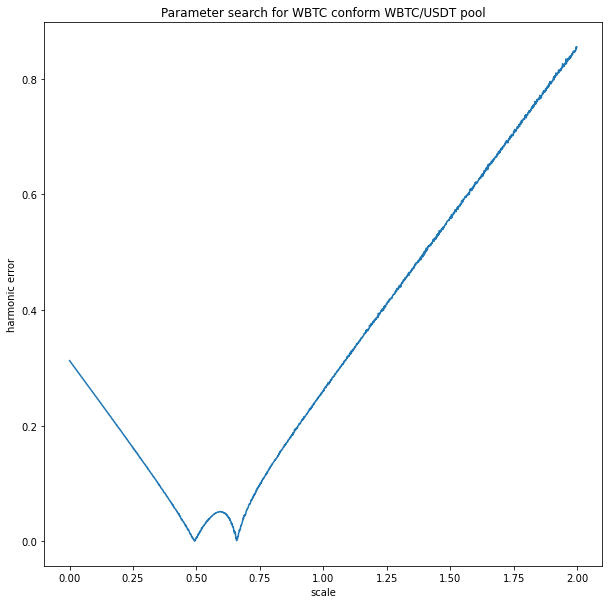

In [572]:
searcher = ParameterSearcher(CauchyGenerator(loc=0, scale=15000, limit=15), th.user_in_swap_df, "WBTC")

searcher.search_parameters(initial_scale=0, step=0.001, final_scale=2, acc=1000, 
                            title='Parameter search for WBTC conform WBTC/USDT pool')

cauchy min token in = 1.933759824806788e-06
cauchy max token in = 14.484638759485563


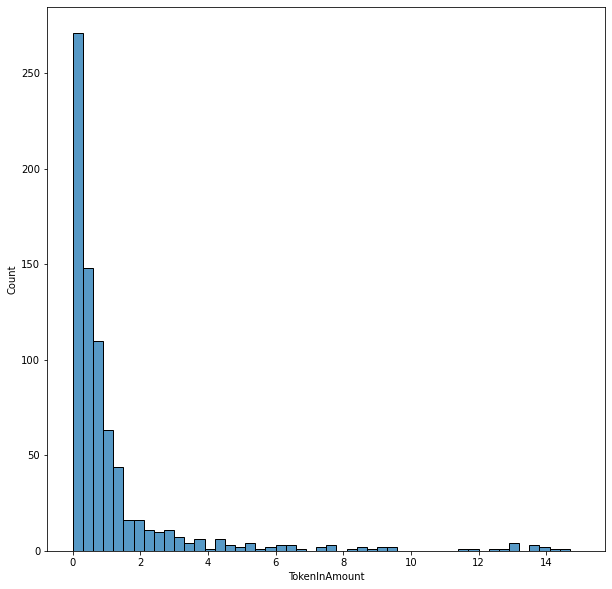

In [575]:
cauchy_simulation = MonteCarloTransactionSimulator(frequency_generator=PoissonGenerator(cycle_size=60000, mean_occurencies=0.07512639970222401),
                                                    token_in_generator=CauchyGenerator(0, 0.492, 15),
                                                    first_currency="first", second_currency="second")

generator_week_df_and_plot(simulator=cauchy_simulation, time_window=60*24*7, x_size=10, y_size=10, x_bin_limit=15)

(4.332374639556669, 34950)


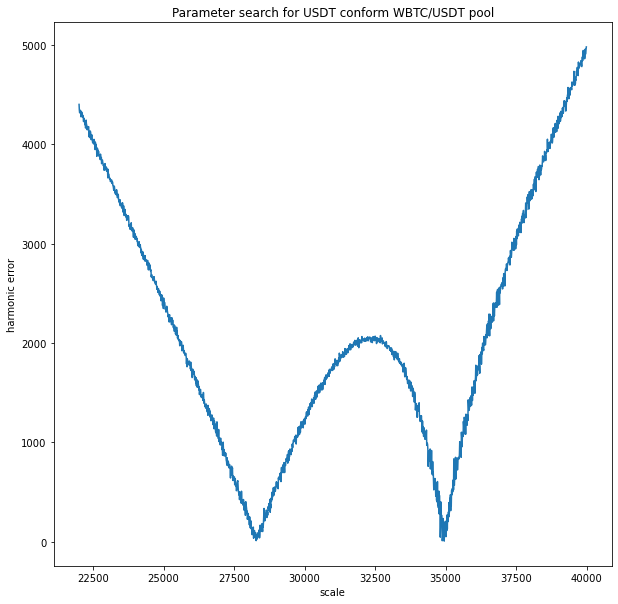

In [578]:
searcher = ParameterSearcher(CauchyGenerator(loc=0, scale=15000, limit=550000), th.user_in_swap_df, "USDT")

searcher.search_parameters(initial_scale=22000, step=10, final_scale=40000, acc=1000, 
                            title='Parameter search for USDT conform WBTC/USDT pool')

In [32]:
cauchy_simulation = MonteCarloTransactionSimulator(frequency_generator=PoissonGenerator(cycle_size=60000, mean_occurencies=2),
                                                    token_in_generator=CauchyGenerator(0, 34950, 550000),
                                                    first_currency="first", second_currency="second")

generator_week_df_and_plot(simulator=cauchy_simulation, time_window=60*24*7, x_size=10, y_size=10, x_bin_limit=550000)

['USDT' 'WBTC']


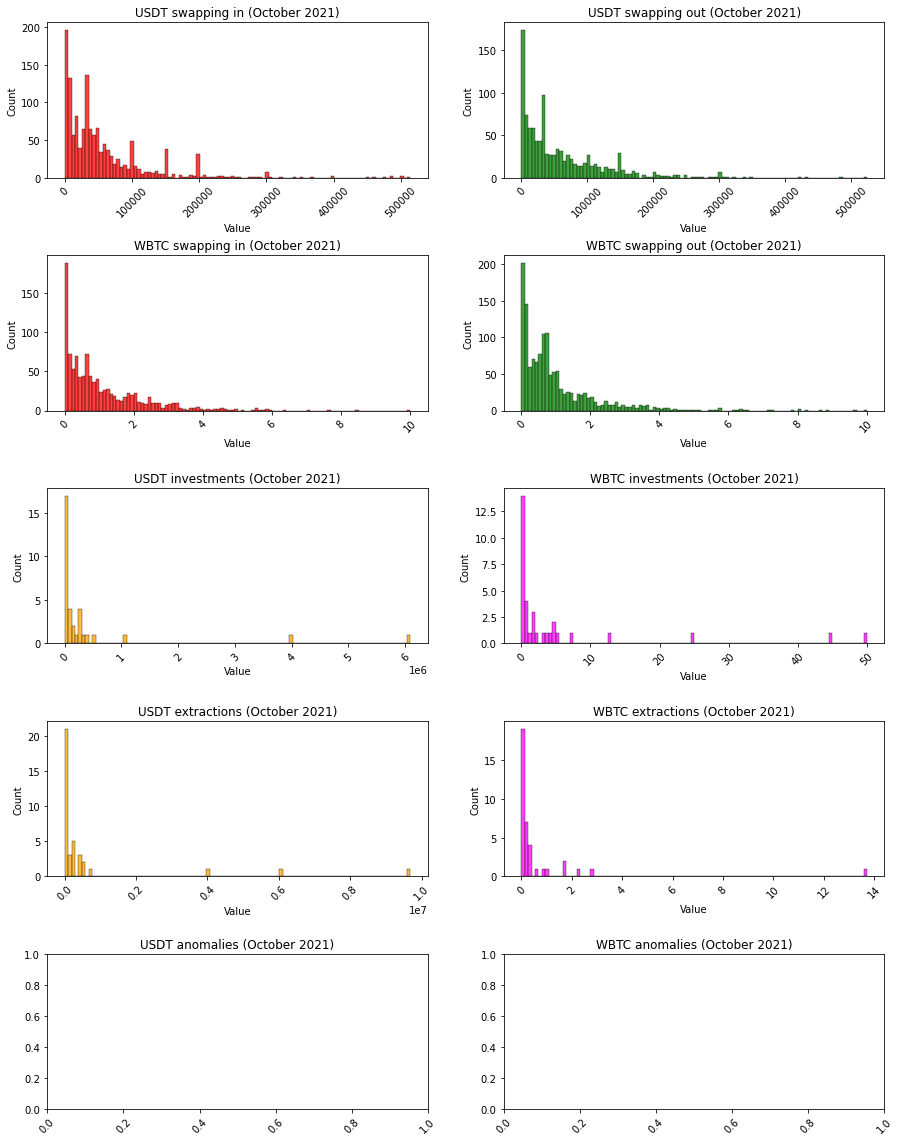

In [180]:
th.histplots_matrix(15, 20, 0.5, 0.2, 'October 2021', 100)

['USDT' 'WBTC']


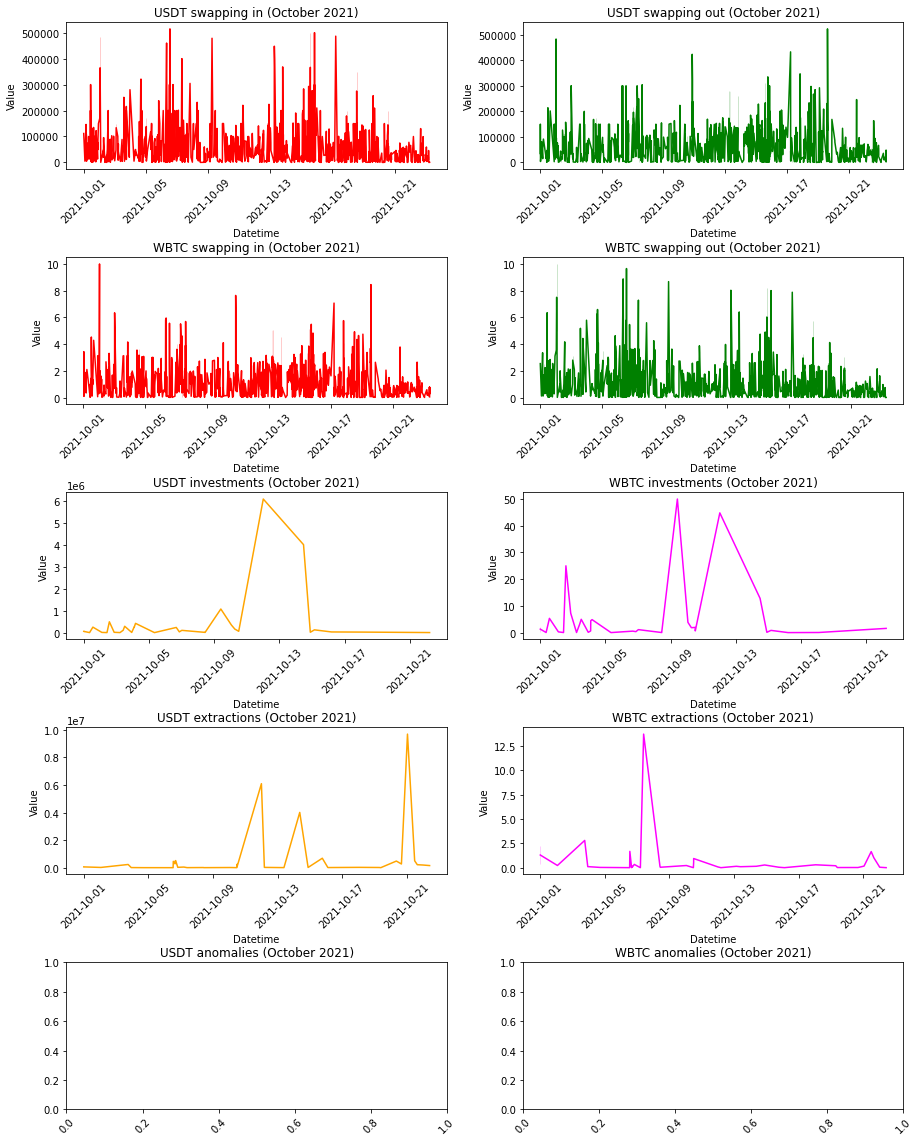

In [179]:
th.lineplots_matrix(15, 20, 0.6, 0.2, 'October 2021')

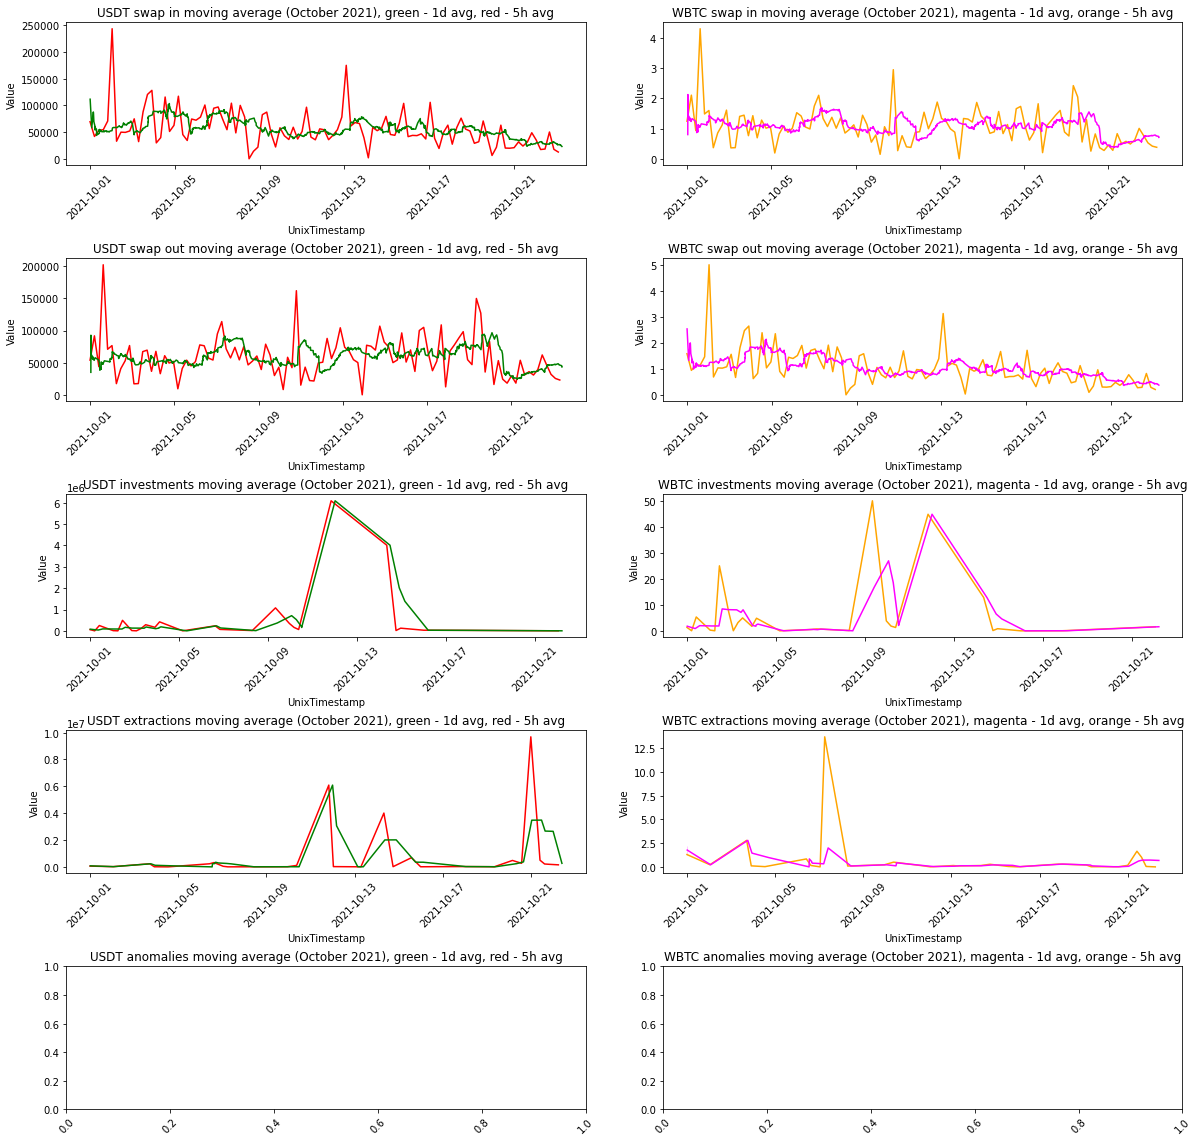

In [183]:
th.lineplots_moving_averages_matrix_by_token(20, 20, 0.65, 0.15, 'USDT', 'WBTC', 'October 2021', '5h', '1d')

# Extremely low capitalization pools

## ankrETH/ETH

Considering that all pools presented in this category have very small capitalizations and distribution is problematic it is important to make Cauchy as close to given distribution as it can be.

In [27]:
# read transaction history
ankr_eth_df = pd.read_csv(os.getcwd() + "\stress_test_sim\pools_history\low_cap_v2_ankrETH-ETH_01-10_31-10.csv", index_col=False)

# make sure that Value will be interpreted as floating point number, remove possible 0 value elements
ankr_eth_df.Value = ankr_eth_df.Value.astype("float")
ankr_eth_df = ankr_eth_df[ankr_eth_df.Value > 0]

# make sure that datetime parameter is interpreted as date
ankr_eth_df['Datetime'] = pd.to_datetime(ankr_eth_df['UnixTimestamp'], unit='s')

# form transaction history separated by categories
th = TransactionHistory()
th.classify_history(ankr_eth_df)

In [28]:
th.show_transactions_frequencies_per_minute()
th.show_min_max_values_by_token()

Swapping in WETH transactions frequency: 0.00035608006714652694
Swapping in aETHc transactions frequency: 0.0008902001678663174
Swapping out transactions frequency: 0.0012462802350128443
Investitions frequency: nan
Extractions frequency: nan
swapping in WETH min = 0.0127882009828686
swapping in WETH max = 20.665929918475403
swapping out WETH min = 0.0381590641729948
swapping out WETH max = 20.162679631472635
swapping in aETHc min = 0.0398800071320685
swapping in aETHc max = 21.263128685142046
swapping out aETHc min = 0.01218065859158
swapping out aETHc max = 21.649714633703773


(7.536132090785354e-05, 5.742000000000164)


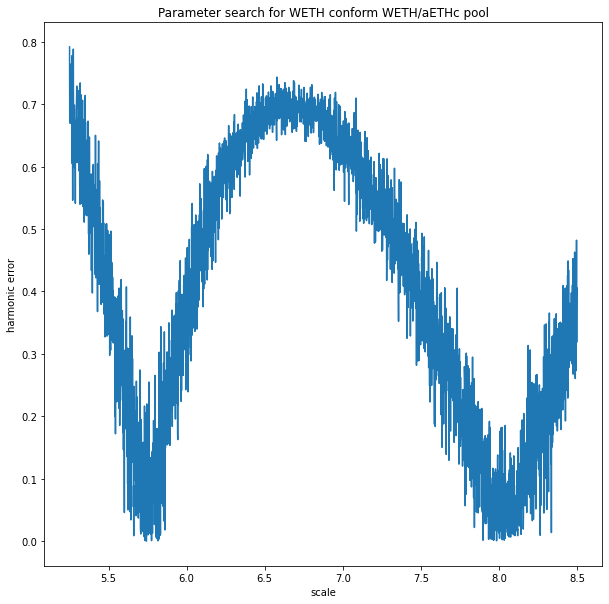

In [21]:
searcher = ParameterSearcher(CauchyGenerator(loc=0, scale=15000, limit=25), th.user_in_swap_df, "WETH")

searcher.search_parameters(initial_scale=5.25, step=0.001, final_scale=8.5, acc=2500, 
                            title='Parameter search for WETH conform WETH/aETHc pool')

cauchy min token in = 10.50994255363568
cauchy max token in = 24.63051774493012


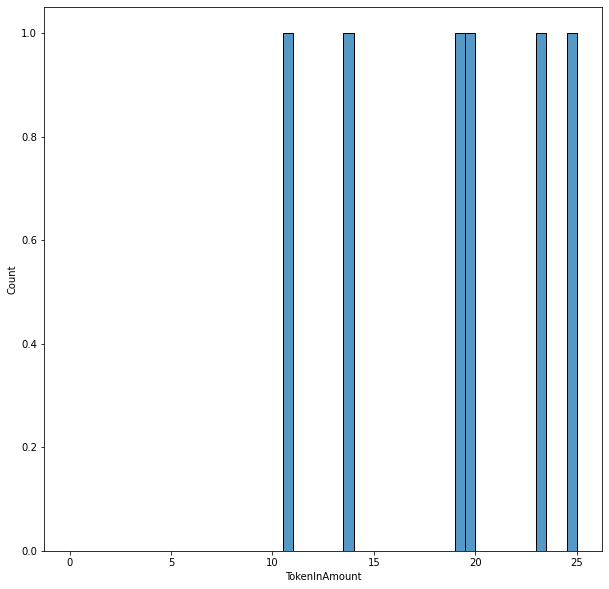

In [70]:
cauchy_simulation = MonteCarloTransactionSimulator(frequency_generator=PoissonGenerator(cycle_size=60000, mean_occurencies=0.0012462802350128443),
                                                    token_in_generator=CauchyGenerator(0, 5.742000000000164, 25),
                                                    first_currency="first", second_currency="second")

generator_week_df_and_plot(simulator=cauchy_simulation, time_window=60*24*7, x_size=10, y_size=10, x_bin_limit=25)

(8.366551617576884e-05, 1.0110000000000006)


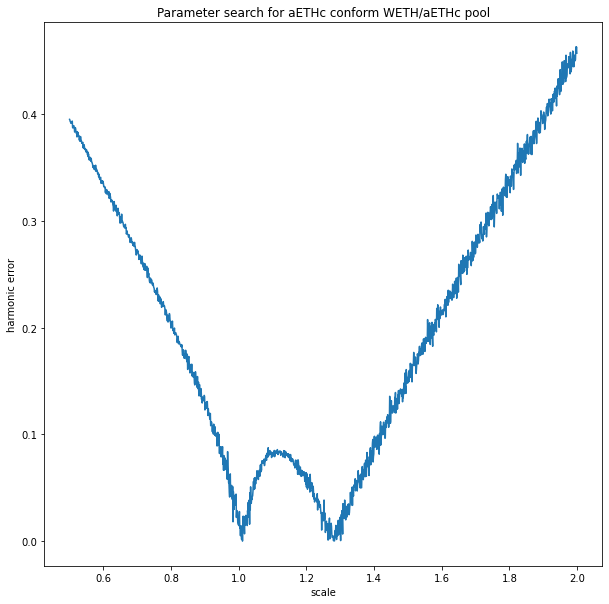

In [26]:
searcher = ParameterSearcher(CauchyGenerator(loc=0, scale=15000, limit=25), th.user_in_swap_df, "aETHc")

searcher.search_parameters(initial_scale=0.5, step=0.001, final_scale=2, acc=2500, 
                            title='Parameter search for aETHc conform WETH/aETHc pool')

cauchy min token in = 0.2543566187234465
cauchy max token in = 10.096633700848063


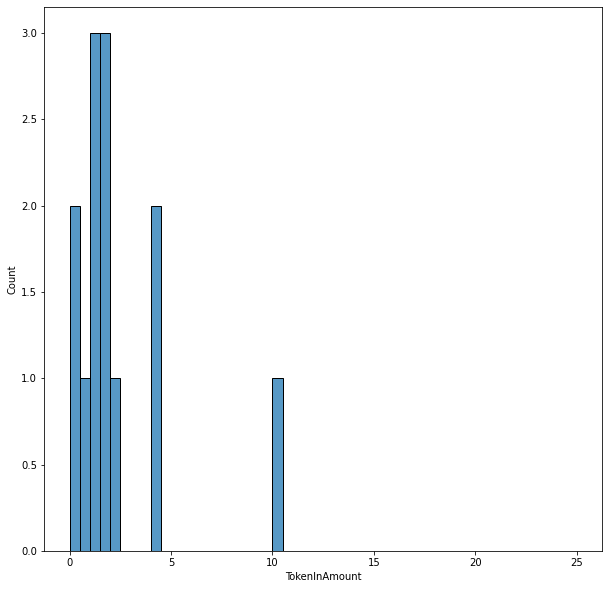

In [69]:
cauchy_simulation = MonteCarloTransactionSimulator(frequency_generator=PoissonGenerator(cycle_size=60000, mean_occurencies=0.0012462802350128443),
                                                    token_in_generator=CauchyGenerator(0, 1.0110000000000006, 25),
                                                    first_currency="first", second_currency="second")

generator_week_df_and_plot(simulator=cauchy_simulation, time_window=60*24*7, x_size=10, y_size=10, x_bin_limit=25)

['WETH' 'aETHc']


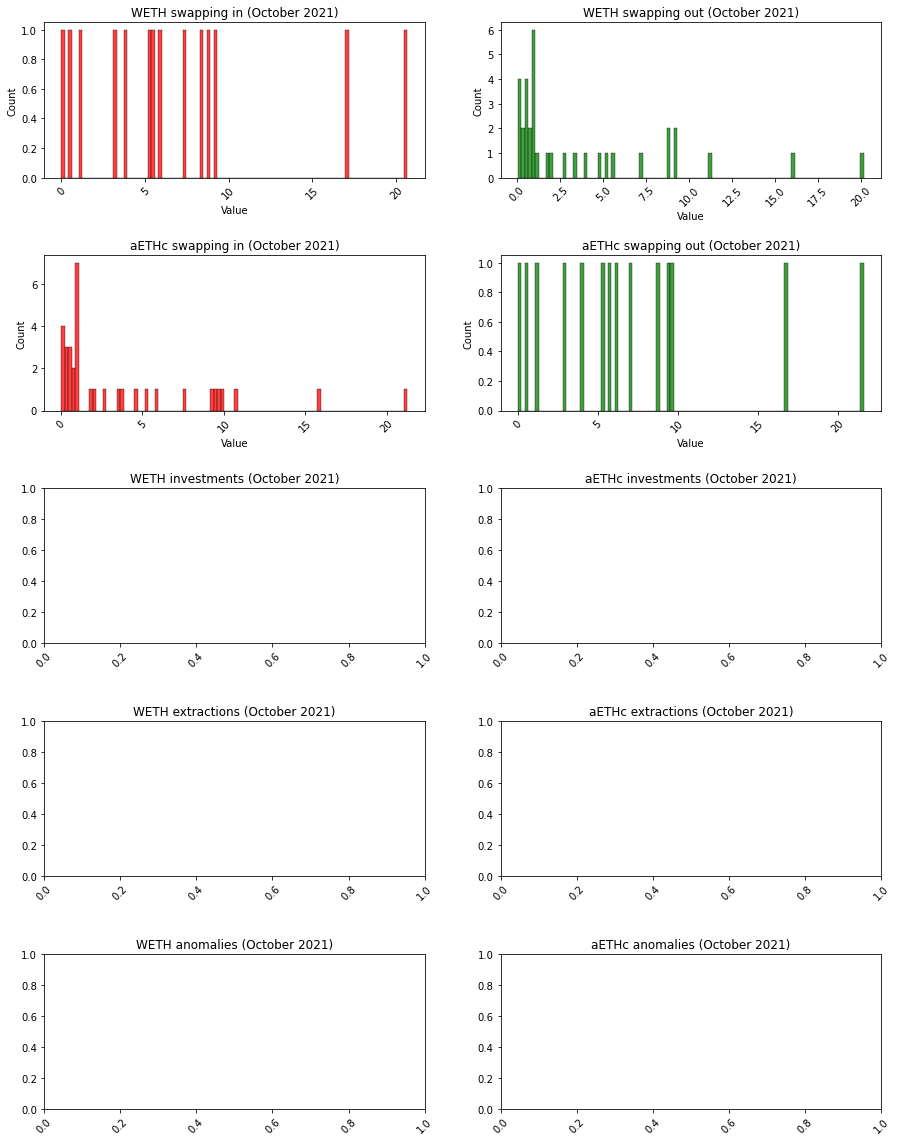

In [13]:
th.histplots_matrix(15, 20, 0.5, 0.2, 'October 2021', 100)

['WETH' 'aETHc']


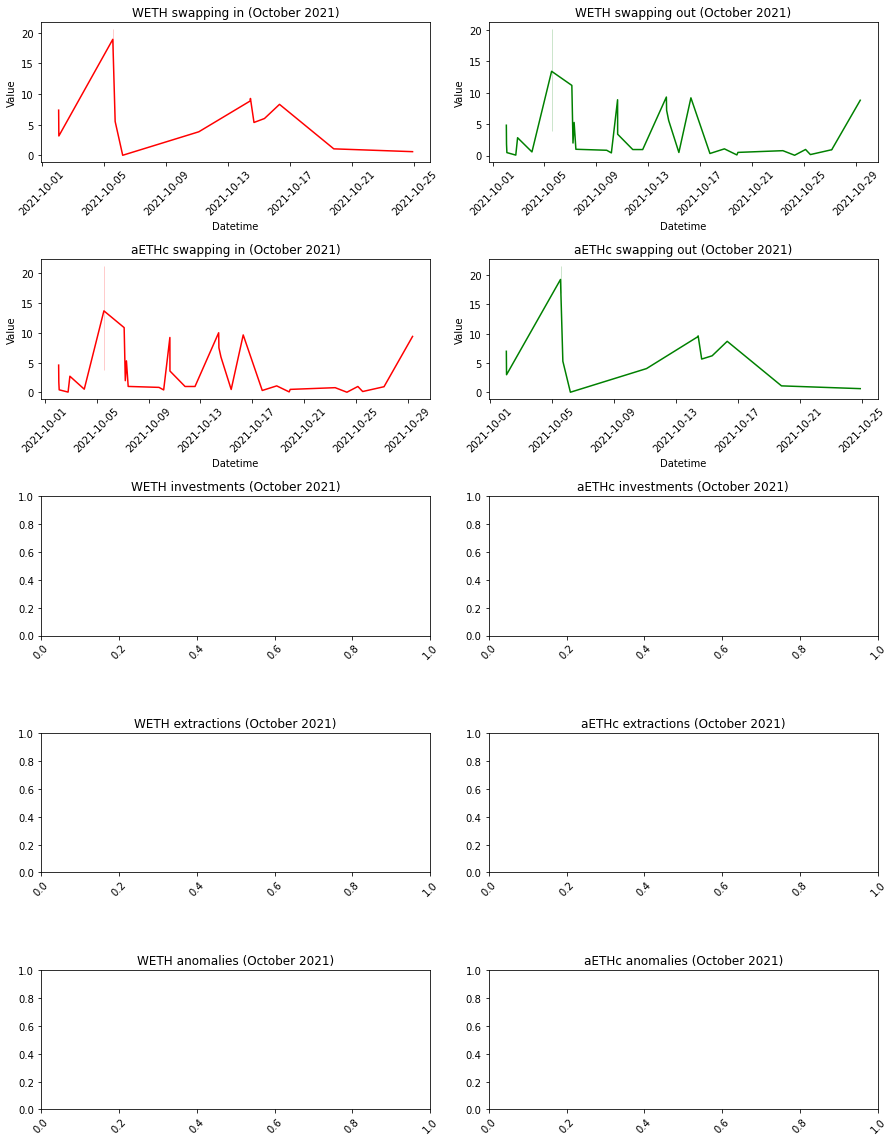

In [31]:
th.lineplots_matrix(15, 20, 0.7, 0.15, 'October 2021')

## FNK/USDT

In [2]:
# read transaction history
fnk_usdt_df = pd.read_csv(os.getcwd() + "\stress_test_sim\pools_history\csv_tables\low_FNK-USDT_01-01_31-10.csv", index_col=False)
# fnk_usdt_df = pd.read_csv(os.getcwd() + "\stress_test_sim\pools_history\csv_tables\low_FNK-USDT_01-10_31-10.csv", index_col=False)

# make sure that Value will be interpreted as floating point number, remove possible 0 value elements
fnk_usdt_df.Value = fnk_usdt_df.Value.str.replace(",", "")
fnk_usdt_df.Value = fnk_usdt_df.Value.astype("float")
fnk_usdt_df = fnk_usdt_df[fnk_usdt_df.Value > 0]

# make sure that datetime parameter is interpreted as date
fnk_usdt_df['Datetime'] = pd.to_datetime(fnk_usdt_df['UnixTimestamp'], unit='s')

# form transaction history separated by categories
th = TransactionHistory()
th.classify_history(fnk_usdt_df)

In [3]:
th.show_transactions_frequencies_per_minute()
th.show_min_max_values_by_token()

Swapping in USDT transactions frequency: 0.09069311021588679
Swapping in FNK transactions frequency: 0.15659539303790931
Swapping out transactions frequency: 0.2472885032537961
Investitions frequency: 0.006009488666315234
Extractions frequency: 0.004753820033955857
swapping in USDT min = 0.055
swapping in USDT max = 72222.1
swapping out USDT min = 2.106994
swapping out USDT max = 85422.198682
swapping in FNK min = 0.03
swapping in FNK max = 2197.05850281
swapping out FNK min = 0.000825803490085849
swapping out FNK max = 1935.769495487505


In [4]:
fnk_usdt_df.Datetime.min()

Timestamp('2021-06-18 06:10:12')

In [5]:
fnk_usdt_df.Datetime.max()

Timestamp('2021-06-24 23:40:04')

(0.331740429807857, 324)


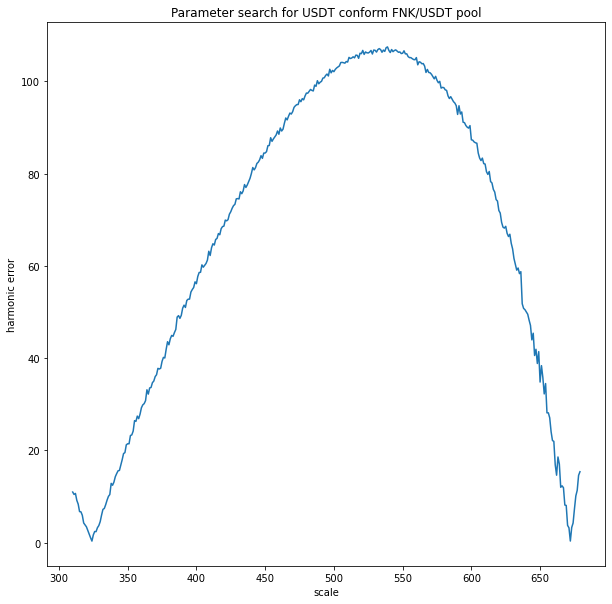

In [8]:
searcher = CauchyParameterSearcher(CauchyGenerator(loc=0, scale=15000, limit=6000), th.user_in_swap_df, "USDT")

searcher.search_parameters(initial_scale=310, step=1, final_scale=680, acc=1000, 
                            title='Parameter search for USDT conform FNK/USDT pool')

cauchy min token in = 59.85278054014187
cauchy max token in = 2727.344659233729


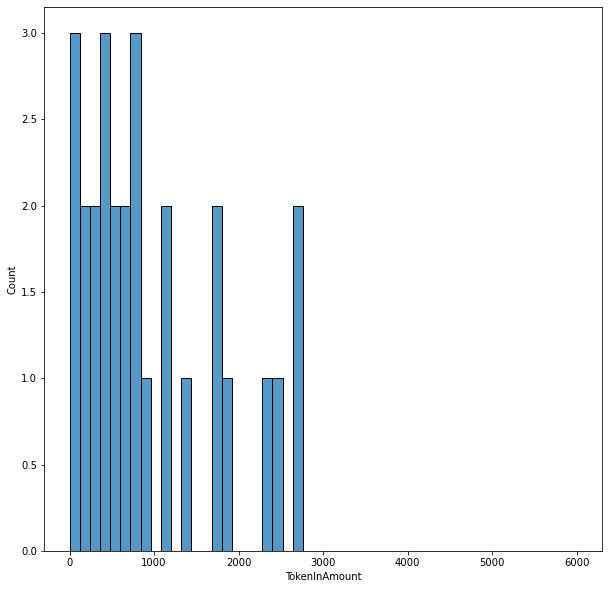

In [51]:
cauchy_simulation = MonteCarloTransactionSimulator(frequency_generator=PoissonGenerator(cycle_size=60000, mean_occurencies=0.002641795502056006),
                                                    token_in_generator=CauchyGenerator(0, 635.1000000000034, 6000), 
                                                    first_currency="first", second_currency="second")

generator_week_df_and_plot(simulator=cauchy_simulation, time_window=60*24*7, x_size=10, y_size=10, x_bin_limit=6000)

(0.004958437032880482, 938.1899999999744)


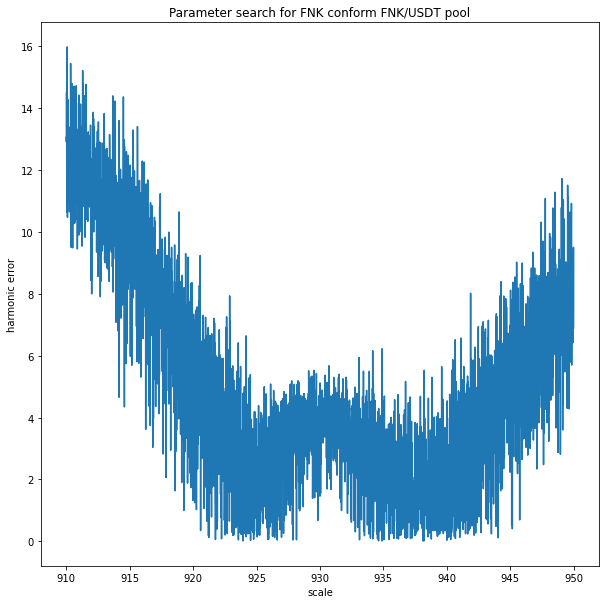

In [66]:
searcher = ParameterSearcher(CauchyGenerator(loc=0, scale=15000, limit=15000), th.user_in_swap_df, "FNK")

searcher.search_parameters(initial_scale=910, step=0.01, final_scale=950, acc=5000, 
                            title='Parameter search for FNK conform FNK/USDT pool')

cauchy min token in = 47.97941343551379
cauchy max token in = 11354.322732047298


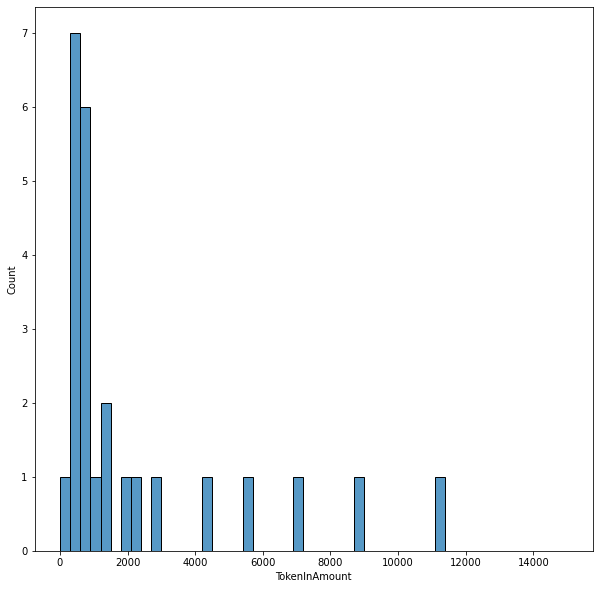

In [68]:
cauchy_simulation = MonteCarloTransactionSimulator(frequency_generator=PoissonGenerator(cycle_size=60000, mean_occurencies=0.002641795502056006),
                                                    token_in_generator=CauchyGenerator(0, 938.1899999999744, 15000), 
                                                    first_currency="first", second_currency="second")

generator_week_df_and_plot(simulator=cauchy_simulation, time_window=60*24*7, x_size=10, y_size=10, x_bin_limit=15000)

['USDT' 'FNK']


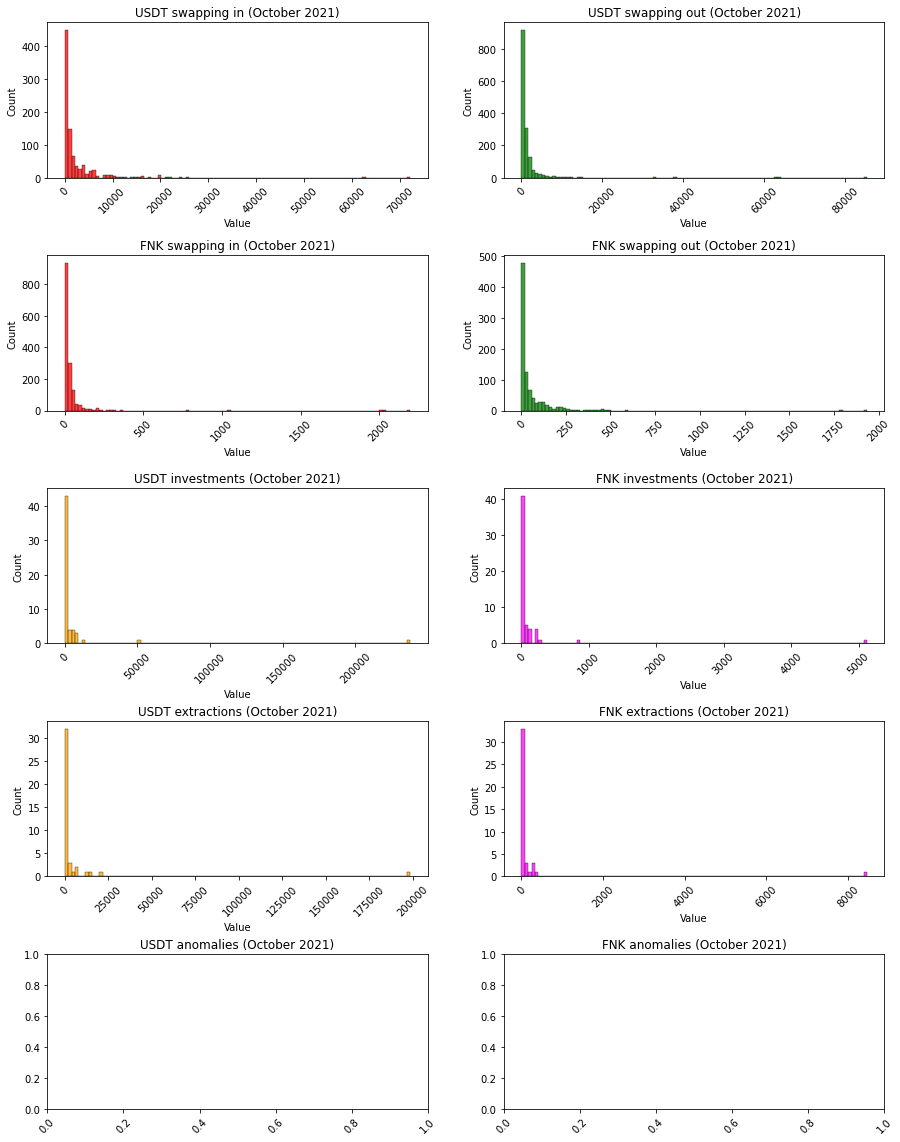

In [12]:
th.histplots_matrix(15, 20, 0.5, 0.2, 'June 2021', 100)

['USDT' 'FNK']


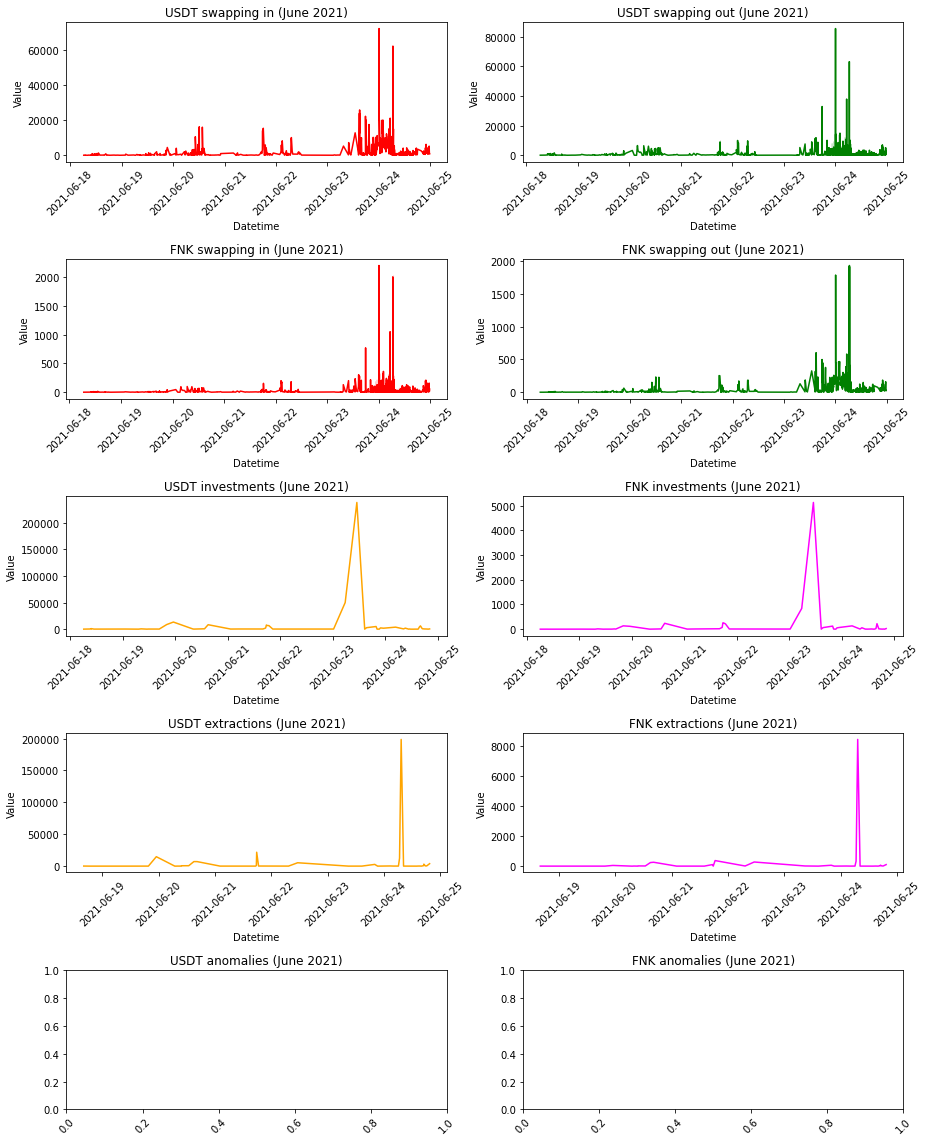

In [13]:
th.lineplots_matrix(15, 20, 0.7, 0.2, 'June 2021')